# Tasca M6 T01

Exercicis per practicar amb regressions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import scipy.stats as stats

In [2]:
# configurar els gràfics
sns.set_style('whitegrid')
sns.set_palette('flare')

In [3]:
# Llegir l'arxiu
rawhousing = pd.read_csv("C:/Users/Patricia/Downloads/housingdataM6.csv", sep=',', header=None)

In [4]:
# Afegir els noms de les columnes
rawhousing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PRATIO', 'B_1000', 'LSTAT', 'MEDV']

In [5]:
# Carregar l'informació adicional del dataset
info_columnes = {
    'CRIM': 'per capita crime rate by town',
    'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft.',
    'INDUS': 'proportion of non-retail business acres per town',
    'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
    'NOX' : 'nitric oxides concentration (parts per 10 million)',
    'RM': 'average number of rooms per dwelling',
    'AGE': 'proportion of owner-occupied units built prior to 1940',
    'DIS': 'weighted distances to five Boston employment centres',
    'RAD': 'index of accessibility to radial highways',
    'TAX': 'full-value property-tax rate per 10,000 dollars',
    'PRATIO': 'pupil-teacher ratio by town',
    'B_1000': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
    'LSTAT': '% lower status of the population',
    'MEDV': 'Median value of owner-occupied homes in $1000\'s'
}

In [6]:
housing = pd.DataFrame(rawhousing)

### Preprocessat

##### Test de normalitat

In [86]:
from scipy.stats import kstest

alpha: 0.5

for variable in rawhousing:
    stat, p_value = kstest(housing[variable], 'norm')
    
    print("Variable:", variable)
    print("Estadístic de prova:", stat)
    print("Valor p:", p_value)
    print()

Variable: CRIM
Estadístic de prova: 0.47225874284346836
Valor p: 4.317441468339137e-104

Variable: ZN
Estadístic de prova: 0.5
Valor p: 1.6871111181943794e-117

Variable: INDUS
Estadístic de prova: 0.5070140372144603
Valor p: 4.772621812025944e-121

Variable: CHAS
Estadístic de prova: 0.5
Valor p: 1.6871111181943794e-117

Variable: NOX
Estadístic de prova: 0.5017933143888115
Valor p: 2.1188821631686105e-118

Variable: RM
Estadístic de prova: 0.11026647838432088
Valor p: 8.184624248321214e-06

Variable: AGE
Estadístic de prova: 0.5172113118269898
Valor p: 2.5268871560879205e-126

Variable: DIS
Estadístic de prova: 0.25631267775277916
Valor p: 8.464239490974601e-30

Variable: RAD
Estadístic de prova: 0.5
Valor p: 1.6871111181943794e-117

Variable: TAX
Estadístic de prova: 0.5
Valor p: 1.6871111181943794e-117

Variable: PRATIO
Estadístic de prova: 0.5547927156796985
Valor p: 5.110404932300359e-147

Variable: B_1000
Estadístic de prova: 0.6713632002019021
Valor p: 1.170963432379247e-225

V

##### Distribució

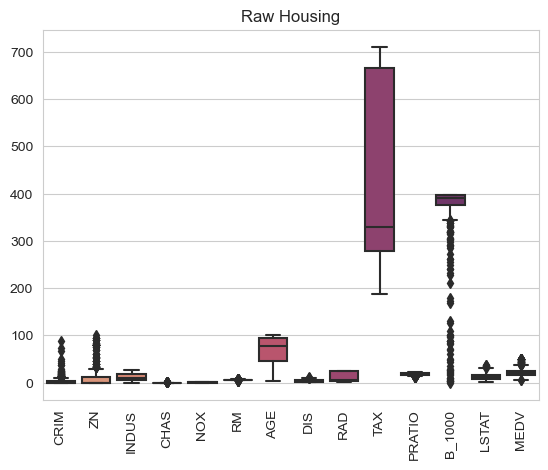

In [10]:
# A tot el dataset
sns.boxplot(data=housing, palette='flare')
plt.title('Raw Housing')
plt.xticks(rotation=90)
plt.show()

Podem observar la presència d'outliers a múltiples columnes: CRIM, ZN, B_1000, LSTAT i MEDV

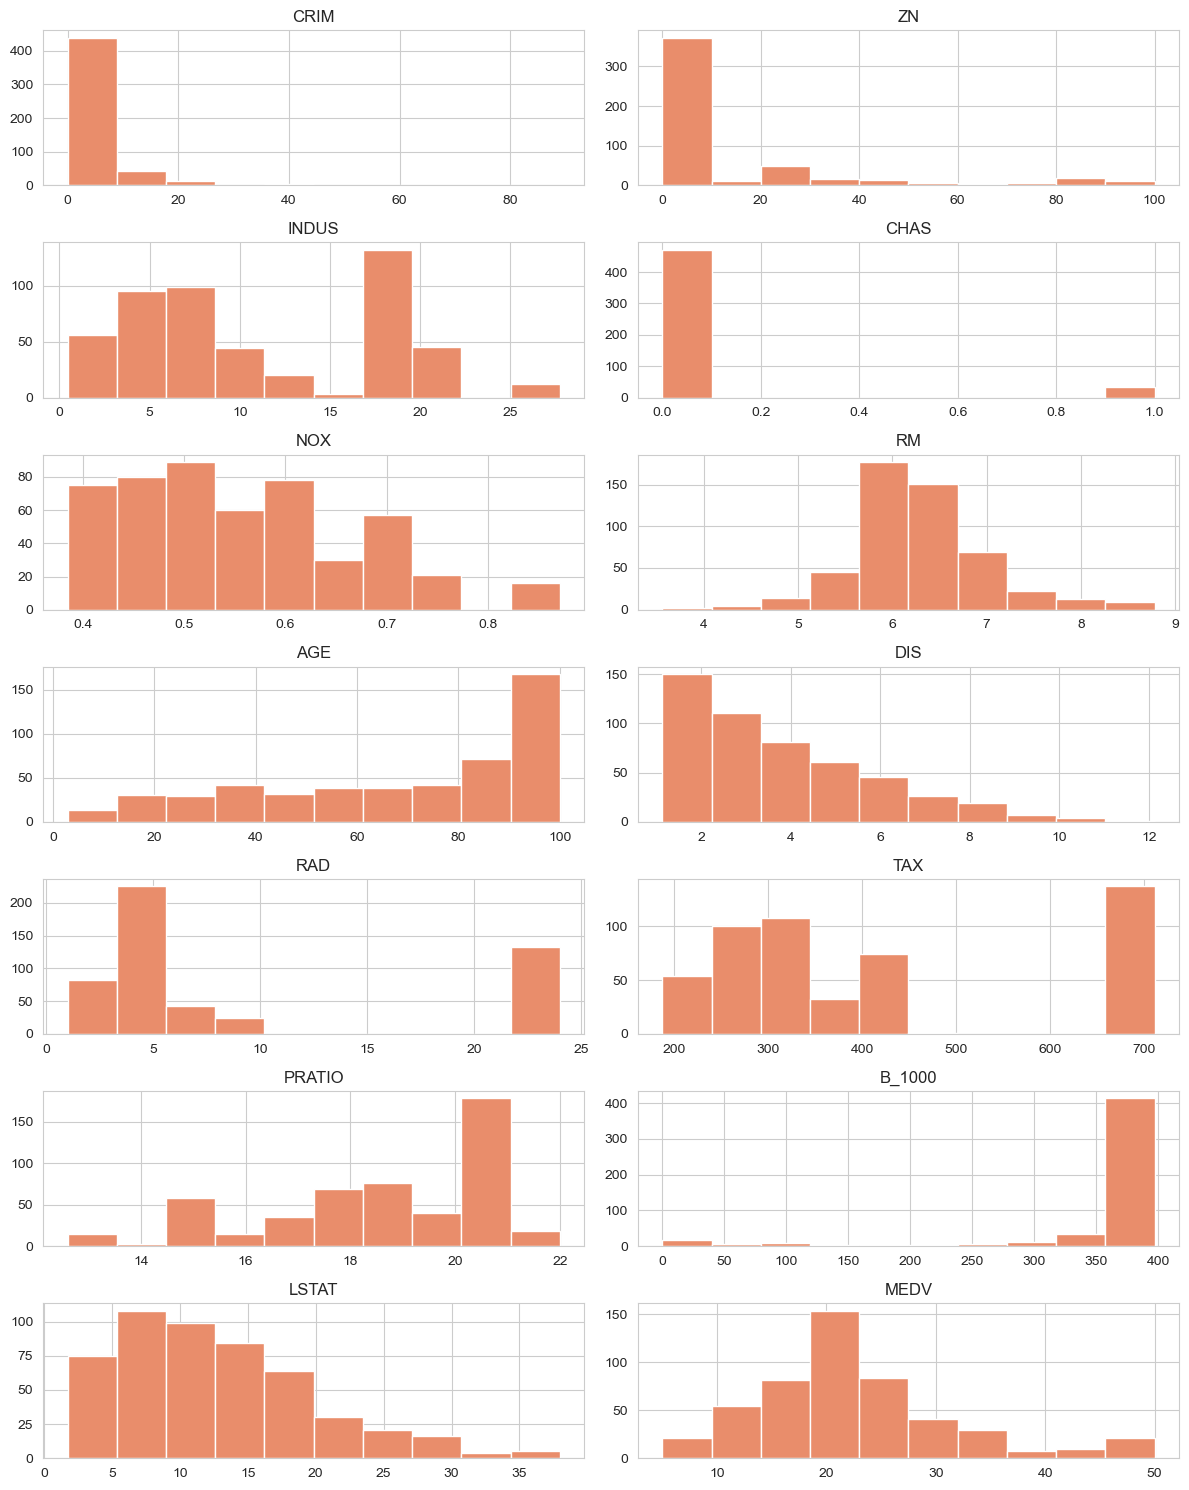

In [11]:
#Per cada variable

# Crear una figura i eixos per als subplots
fig, axs = plt.subplots(7, 2, figsize=(12, 15))

# Iterar sobre les columnes i generar els histogrames
axs = axs.ravel()

# Iterar sobre las columnas y generar los histogramas
for i, columna in enumerate(housing.columns):
    # Generar l'histograma per a la columna actual
    axs[i].hist(housing[columna], bins=10)
    
    # Establir el títol de la columna a l'histograma
    axs[i].set_title(columna)

    # Ajustar l'índex per mostrar dos histogrames per fila
    if (i+1) % 2 == 0:
        plt.subplots_adjust(hspace=0.4)

# Ajustar l'espai entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

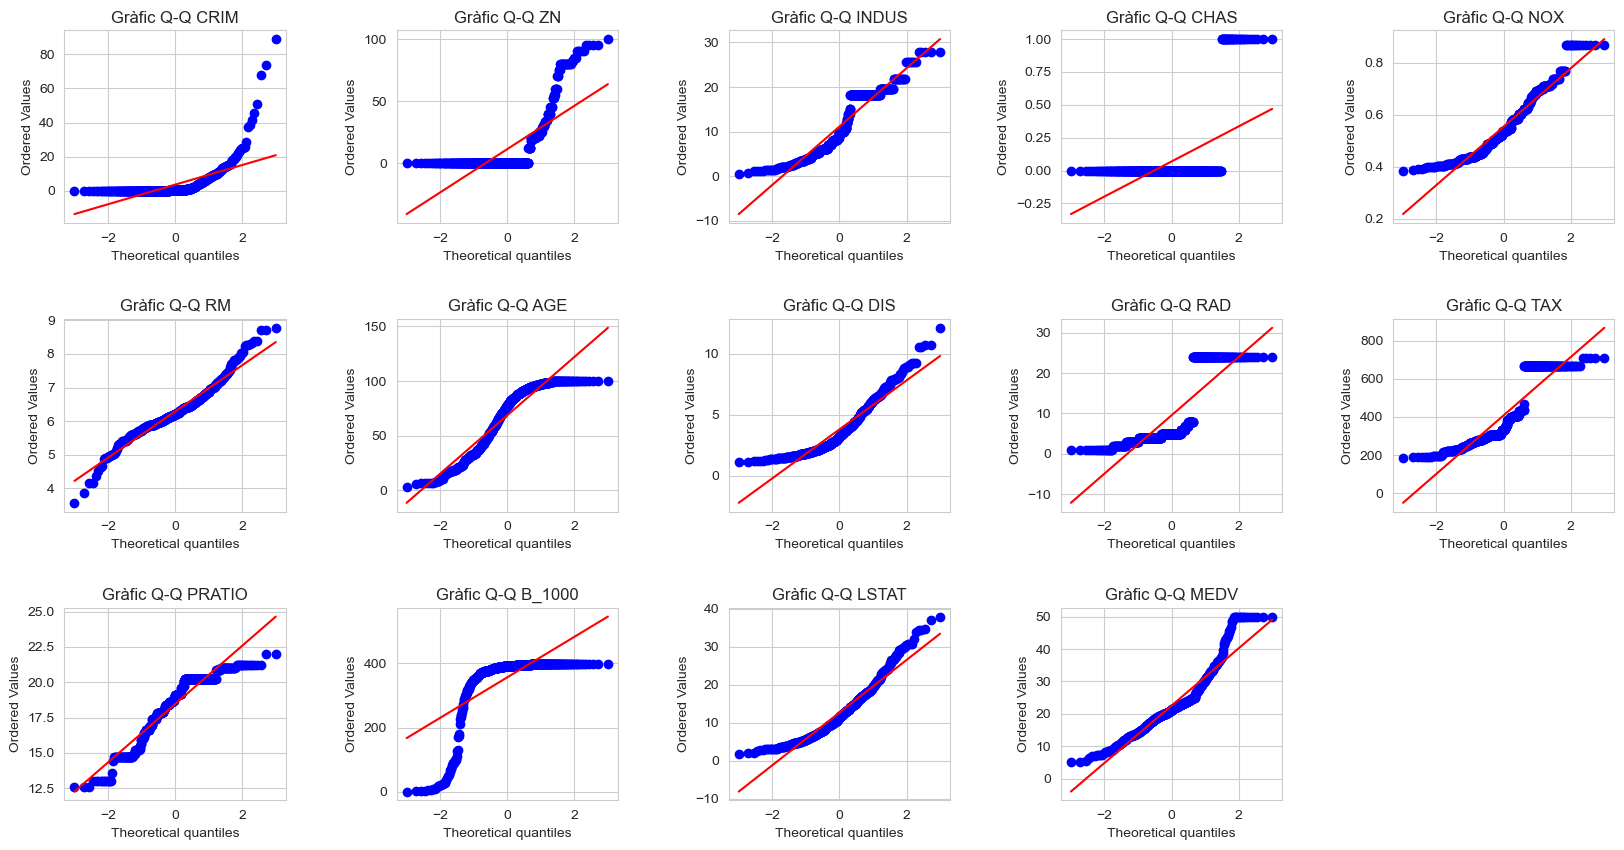

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))

# Iteració sobre les columnes del conjunt de dades 'housing' i els eixos corresponents
for idx, (col, ax) in enumerate(zip(housing.columns, axes.flatten())):
    # Generació de la gràfica Q-Q utilitzant stats.probplot
    stats.probplot(housing[col], dist='norm', plot=ax)
    
    # Ajustament dels espais entre subgràfiques
    plt.subplots_adjust(wspace=.5, hspace=.5)
    
    # Establiment del títol de la gràfica Q-Q amb el nom de la columna
    ax.set_title("Gràfic Q-Q " + col)

# Amagar els eixos addicionals si no hi ha columnes suficients per omplir totes les subgràfiques
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]


##### Correlació

    Primero revisemos la correlación de cada variable en relación con MEDV

In [13]:
housing.corr()['MEDV']

CRIM     -0.388305
ZN        0.360445
INDUS    -0.483725
CHAS      0.175260
NOX      -0.427321
RM        0.695360
AGE      -0.376955
DIS       0.249929
RAD      -0.381626
TAX      -0.468536
PRATIO   -0.507787
B_1000    0.333461
LSTAT    -0.737663
MEDV      1.000000
Name: MEDV, dtype: float64

    Y ara en un clustermap,  les cel·les del clustermap estan acolorides segons el nivell de correlació i els valors de correlació es mostren a cada cel·la per ajudar a interpretar els resultats. Aquesta visualització és útil per identificar patrons i relacions entre les variables en el conjunt de dades.

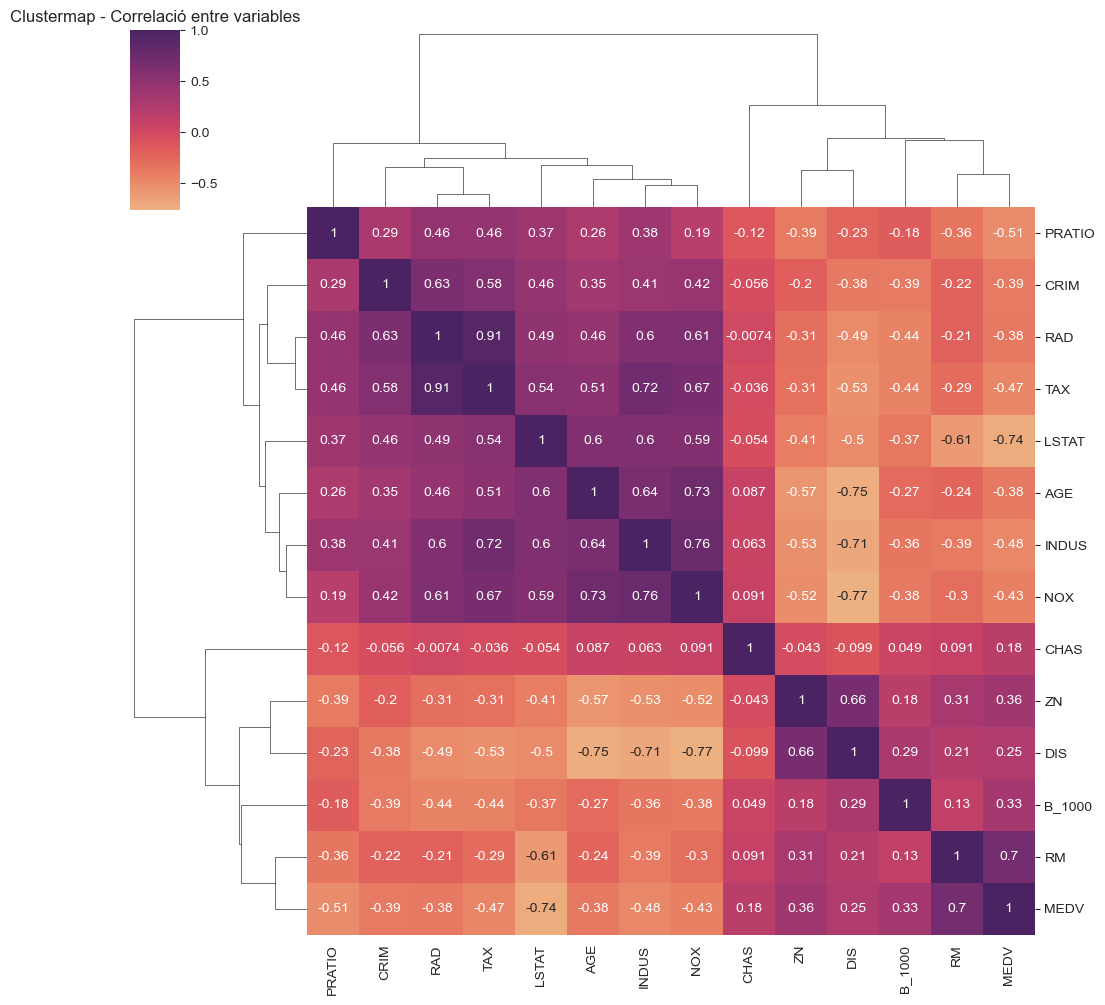

In [14]:
sns.clustermap(housing.corr(), annot=True, cmap='flare')
plt.title('Clustermap - Correlació entre variables')
plt.show()

Alguns atributs a més estan ben correlacionats entre ells.
- INDUS té una correlació alta amb TAX, NOX i LSTAT.  
- NOX té correlació alta amb TAX, correlació mitjana amb LSTAT i RM.  
- RM té correlació alta amb LSTAT, correlació mitjana amb PTRATIO.  
- TAX té correlació mitjana amb PTRATIO i LSTAT.  
- MEDV té una correlacion alta amb RM i LSTAT, la resta per lògica per sobre de +/- 0.4.

    Aquí podem veure un paiplot segons les variables anteriorment anomenades

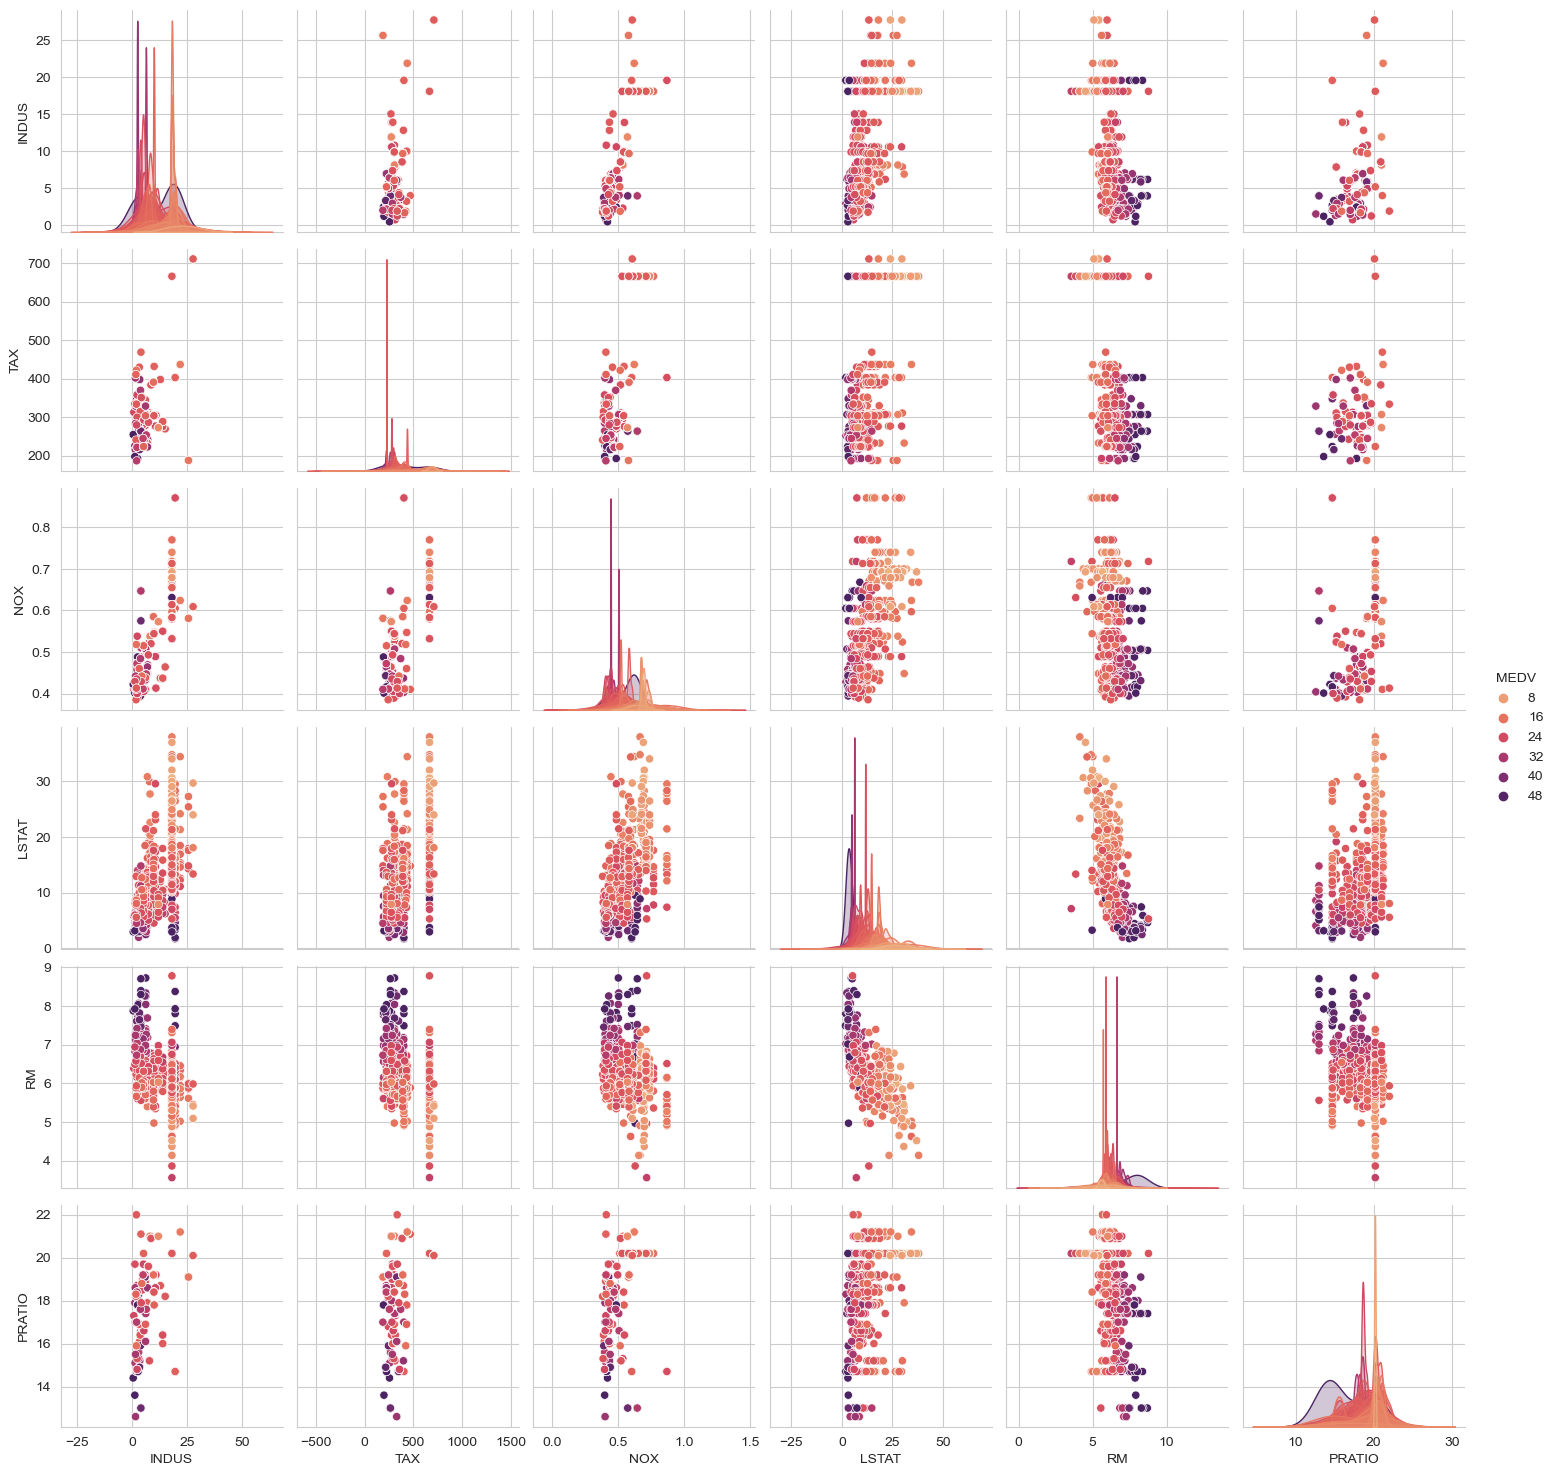

In [15]:
data = housing[['INDUS', 'TAX', 'NOX', 'LSTAT', 'RM', 'PRATIO', 'MEDV']]
sns.pairplot(housing[['INDUS', 'TAX', 'NOX', 'LSTAT', 'RM', 'PRATIO', 'MEDV']], hue='MEDV', palette='flare')
plt.show()

Ara si modifiquem la mida de les nostres variables

##### RobustScaler


El RobustScaler de scikit-learn és una tècnica de pre-processament de dades utilitzada per a l'escalatge de característiques (variables) en un conjunt de dades. La seva funció principal és adaptar les característiques per a ser més resistents a valors atípics o outliers presents en les dades.

A diferència d'altres mètodes d'escalatge, com ara l'escalatge estàndard (StandardScaler), el RobustScaler utilitza estimadors de la mediana i el rang interquartílic per a realitzar l'escalatge. Això permet que el RobustScaler sigui més robust davant de valors atípics en les dades.

from sklearn.preprocessing import RobustScaler
housing[['CRIM', 'ZN', 'LSTAT', 'MEDV', 'AGE']] = RobustScaler().fit_transform(housing[['CRIM', 'ZN', 'LSTAT', 'MEDV', 'AGE']])

In [16]:
from sklearn.preprocessing import RobustScaler
housing[['CRIM', 'ZN', 'RM','DIS','LSTAT', 'MEDV','B_1000']] = RobustScaler().fit_transform(housing[['CRIM', 'ZN', 'RM','DIS','LSTAT', 'MEDV','B_1000']])

##### MinMaxScaler

El MinMaxScaler de scikit-learn és una tècnica de pre-processament de dades que s'utilitza per a l'escalatge de característiques en un conjunt de dades. La seva funció principal és transformar les característiques per a ajustar-les en un rang específic.

Aquest procés assegura que totes les característiques estiguen en el mateix rang específic. És especialment útil quan tenim característiques amb diferents amplituds i volem que totes elles estiguen contingudes en un rang determinat. El MinMaxScaler preserva les relacions de proporcionalitat entre els valors originals, de manera que les proporcions relatives entre les dades es mantenen després de l'escalatge.

El MinMaxScaler és útil en situacions en les quals volem que les dades estiguen en un rang específic, com ara quan volem normalitzar les dades per a un algoritme d'aprenentatge automàtic que requereix que totes les característiques estiguen en el mateix interval. També pot ser útil en algoritmes que utilitzen distàncies o càlculs basats en valors relatius, ja que manté les proporcions entre els valors originals.

from sklearn.preprocessing import MinMaxScaler
housing[['DIS', 'RAD','B_1000','CRIM','ZN',]] = MinMaxScaler().fit_transform(housing[['DIS','RAD', 'B_1000','CRIM','ZN']])

In [17]:
from sklearn.preprocessing import MinMaxScaler
housing[['INDUS','NOX','AGE','TAX', 'RAD','B_1000','PRATIO']] = MinMaxScaler().fit_transform(housing[['INDUS','NOX','AGE','TAX', 'RAD','B_1000','PRATIO']])

___

#### Comparem

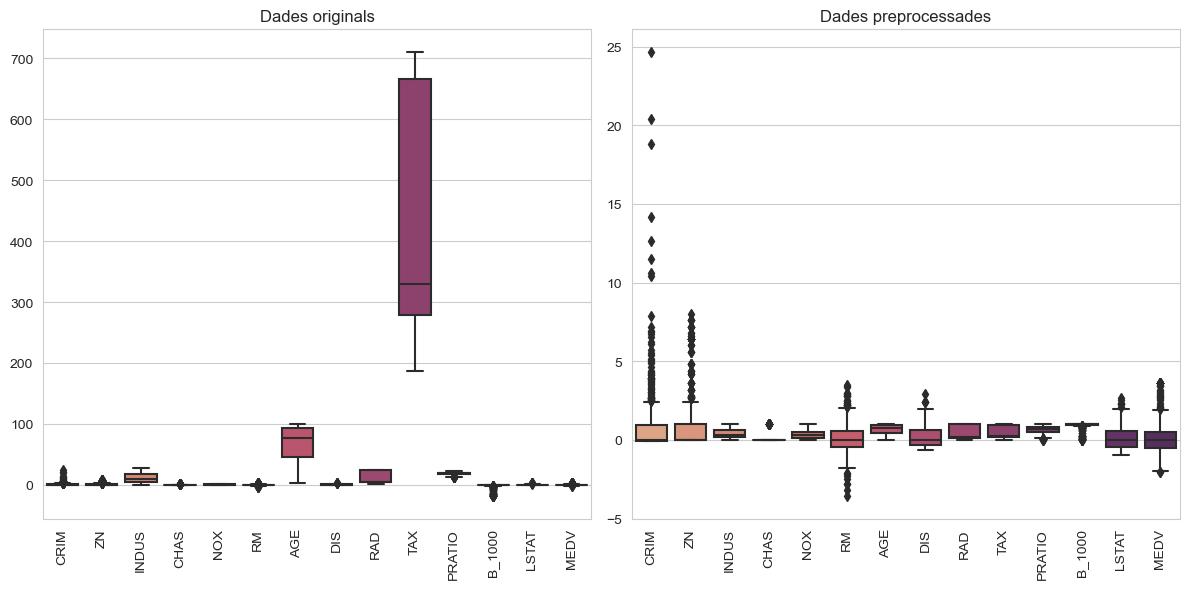

In [18]:
# Gràfic comparatiu

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot del dataset original
sns.boxplot(data=rawhousing, ax=axes[0], palette='flare')
axes[0].set_title('Dades originals')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Boxplot del dataset modificat
sns.boxplot(data=housing, ax=axes[1], palette='flare')
axes[1].set_title('Dades preprocessades')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

    Podem veure una distribució molt més propera a la normalitat

### Divisió train-test

In [19]:
from sklearn.model_selection import train_test_split

# Seleccionar les columnes desitjades com a variables predictores (característiques)
x = housing[['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']]

# Seleccionar la columna MEDV com a variable objectiu
y = housing['MEDV']

# Divisió de les dades en conjunts d'entrenament i prova
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

    A continuació definim la funció "metriques" calcula diferents mètriques d'avaluació d'un model de regressió i les afegeix a un dataframe (df). A continuació, t'explico el propòsit de cada mètrica:

- R2 (R-squared): És una mesura de la bondat dʻajust del model. Mesura la proporció de la variància total de la variable dependent que és explicada pel model. Un valor de R2 proper a 1 indica un bon ajustament del model.

- MSE (Mean Squared Error): És l'error quadràtic mitjà i es calcula com la mitjana dels errors al quadrat entre els valors reals i les prediccions del model. Com més baix sigui el valor del MSE, millor serà la qualitat de l'ajust del model.

- RMSE (Root Mean Squared Error): És l'arrel quadrada de l'MSE i s'utilitza per tenir una mesura de l'error a la mateixa escala que la variable objectiu. És una mesura de la precisió del model, on valors més baixos indiquen una millor precisió.

- MAE (Mean Absolute Error): És l'error absolut mitjà i es calcula com la mitjana de les diferències absolutes entre els valors reals i les prediccions del model. Mesura la magnitud mitjana dels errors a la mateixa unitat que la variable objectiu. Valors més baixos indiquen una millor precisió del model.

In [20]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

def metriques(titulo, df, ytest, prediccio):
    # Càlcul de les mètriques de regressió
    r2 = round(r2_score(ytest, prediccio), 2)
    mse = round(mean_squared_error(ytest, prediccio), 2)
    rmse = round(math.sqrt(mean_squared_error(ytest, prediccio)), 2)
    mae = round(mean_absolute_error(ytest, prediccio), 2)
    
    # Afegir les mètriques al dataframe
    df.append([titulo, r2, "{} %".format(round(r2 * 100, 2)), mse, rmse, mae])

    return df

    Després definim la funció comparar, com el seu nom indica comapra els valors reals "y_test" amb les prediccions del model "prediccions" com els seus residus i genera una visualització gràfica dels resultats. A continuació, t'explico pas a pas què fa la funció:

In [21]:
def comparar(y_test, prediccions, titol):
    # Crear un dataframe amb les dades reals, les prediccions i els residus
    df_prediccion = pd.DataFrame({'Actual': y_test, 'Pred': prediccions, 'Residus': y_test - prediccions})

    # Representació gràfica de les dades reals i les prediccions
    plt.scatter(range(len(y_test)), y_test, color='#EDAD7F', label='Valors reals')
    plt.scatter(range(len(y_test)), prediccions, color='#4B2362', label='Prediccions')

    plt.xlabel('Instàncies')
    plt.ylabel('Variable objectiu')
    plt.title(titol)
    plt.legend()
    plt.show()

    return df_prediccion

#### Linealitat
Primer hem de ver la relació, sobre tot si son lineals o no

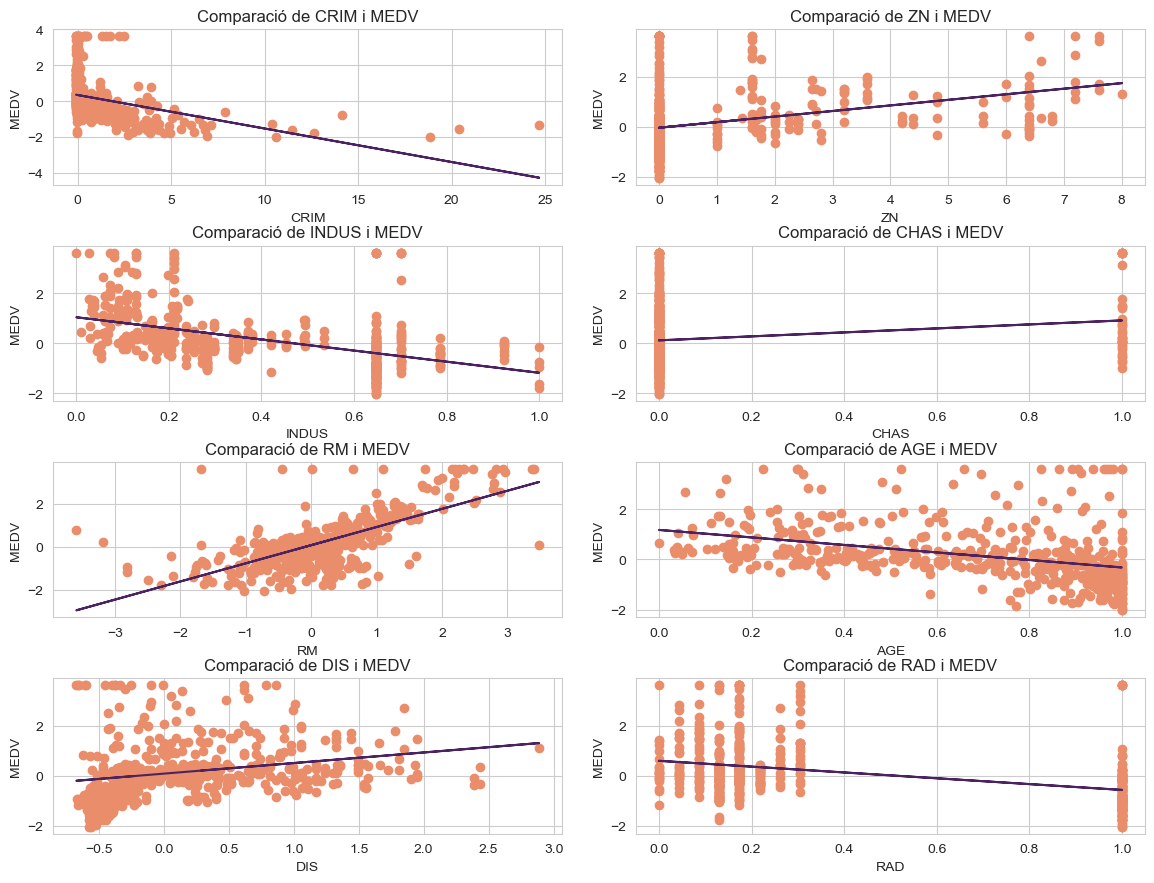

In [22]:
# Crear una figura
fig, axes = plt.subplots(4, 2, figsize=(12, 9))
fig.tight_layout(pad=2.5)

# Iterar pels subplots
for idx, ax in enumerate(axes.flat):
    # Verificar si l'índex és menor que el nombre de columnes en x
    if idx < x.shape[1]:
        # Gràfic de la dispersió entre la columna idx de x i y
        ax.scatter(x.iloc[:, idx], y)
        
        # Establir etiquetes i títols
        ax.set_xlabel('{}'.format(x.columns[idx]))
        ax.set_ylabel('MEDV')
        ax.set_title('Comparació de {} i MEDV'.format(x.columns[idx]))
        
        # Afegim la línia
        ax.plot(x.iloc[:, idx], np.polyval(np.polyfit(x.iloc[:, idx], y, deg=1), x.iloc[:, idx]), color='#4B2362')
    else:
        # Desactivar els eixos dels subplots buits
        ax.axis('off')

# Mostrar la figura
plt.show()

#### Col·linealitat

El Factor d'Inflació de la Variança (Variance Inflation Factor, VIF) és una mesura utilitzada per detectar la multicol·linealitat en un model de regressió. El VIF avalua quant s'infla la variància d'un coeficient de regressió a causa de la multicol·linealitat.

El VIF es calcula per a cada variable predictora al model. Per calcular el VIF d'una variable en particular, es fa una regressió lineal utilitzant totes les altres variables predictores com a predictors. Tot seguit, s'obté el coeficient de determinació (R^2) d'aquesta regressió. El VIF es 
calcula com l'invers de (1 - R^2).

Un VIF igual a 1 indica que no hi ha multicol·linealitat entre la variable i les altres variables predictores. Com més gran sigui el VIF, més gran serà la multicol·linealitat. Es considera que un VIF superior a 5 o 10 indica la presència de multicol·linealitat significativa.

In [23]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i, var in enumerate(sm.add_constant(x_train).columns):
    print(f"{var}: {variance_inflation_factor(sm.add_constant(x_train).values, i)}")

const: 59.75565558368244
CRIM: 1.7131869906128505
ZN: 2.4656307186631237
INDUS: 3.8778553502602815
CHAS: 1.0966737120634569
RM: 1.9478087495837584
AGE: 2.9899478376482778
DIS: 4.16857837354429
RAD: 7.658315779148448
TAX: 8.943301431814218
PRATIO: 1.851448407067041
B_1000: 1.3251213980906689
LSTAT: 2.818045379538576
NOX: 4.469150159170634


Interpretació dels resultats del VIF:

- INDUS: El valor del VIF per a la variable “INDUS” és 3.45. Això indica que hi ha una moderada correlació entre "INDUS" i les altres variables independents al model. Un VIF de 3,45 suggereix que la variància dels coeficients d'INDUS s'infla aproximadament 3,45 vegades a causa de la multicol·linealitat.

- NOX: El valor del VIF per a la variable "NOX" és 3.16. Igual que en el cas de “INDUS”, hi ha una moderada correlació entre “NOX” i les altres variables independents en el model.

- RAD: El valor del VIF per a la variable RAD és 6.85. Això indica una correlació més forta entre RAD i les altres variables independents. El VIF alt suggereix que la multicol·linealitat és un factor important a considerar en interpretar els coeficients de "RAD".

- TAX: El valor del VIF per a la variable TAX és 8.03. Similar a "RAD", "TAX" mostra una alta correlació amb les altres variables independents al model.

- PRATI: El valor del VIF per a la variable "PRATI" és 1.57. Un VIF proper a 1 indica que hi ha poca o cap correlació entre "PRATIO" i les altres variables independents.

- LSTAT: El valor del VIF per a la variable "LSTAT" és 2.44. Un VIF de 2.44 indica una correlació moderada entre “LSTAT” i les altres variables independents.

- RM: El valor del VIF per a la variable "RM" és 1,77. Un VIF proper a 1 indica que "RM" té poca o cap correlació amb les altres variables independents.


#### Presència d'outliers

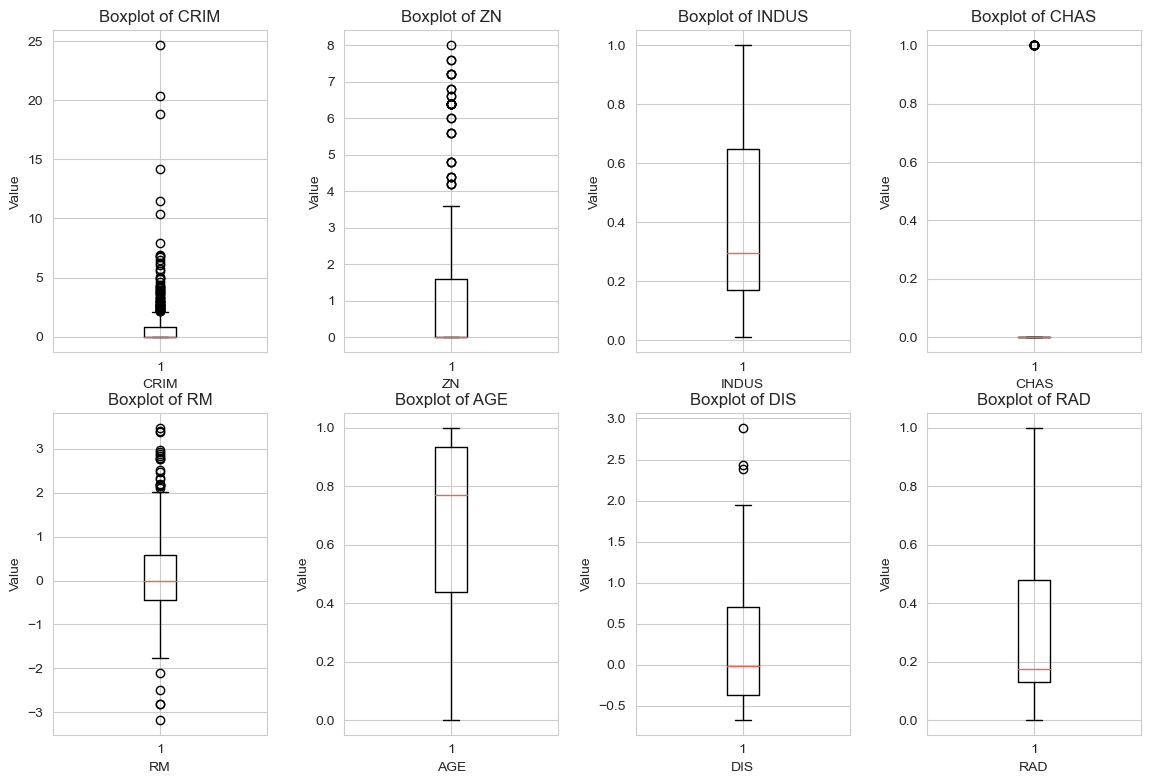

In [24]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
fig.tight_layout(pad=2.5)

for idx, ax in enumerate(axes.flat):
    if idx < x_train.shape[1]:
        ax.boxplot(x_train.iloc[:, idx])
        ax.set_xlabel('{}'.format(x_train.columns[idx]))
        ax.set_ylabel('Value')
        ax.set_title('Boxplot of {}'.format(x_train.columns[idx]))
    else:
        ax.axis('off')

plt.show()

### Regressió lineal
La regressió lineal és un mètode estadístic utilitzat per modelar i analitzar la relació entre una variable dependent i una o més variables independents. En la forma més bàsica, la regressió lineal busca establir una relació lineal entre les variables, és a dir, trobar la millor línia recta que s'ajusti a les dades observades.

In [25]:
metriquesP1 = []

In [26]:
from sklearn.linear_model import LinearRegression

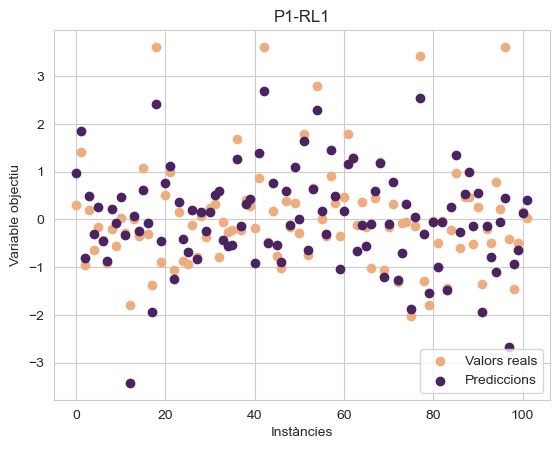

       Actual      Pred   Residus
173  0.300940  0.977646 -0.676705
274  1.404389  1.859005 -0.454616
491 -0.952978 -0.800383 -0.152595
72   0.200627  0.480499 -0.279872
452 -0.639498 -0.304717 -0.334781
Train: 0.7508856358979673
Test: 0.668759493535632
R2:  0.668759493535632


In [27]:
LR1 = LinearRegression()  # Inicialització del model de Regressió Lineal

LR1.fit(x_train, y_train)  # Entrenament del model amb les dades d'entrenament

pred_LR1 = LR1.predict(x_test)  # Realització de les prediccions amb les dades de prova

# Comparació dels valors reals i les prediccions del model de Regressió Lineal
dfLR1 = comparar(y_test, pred_LR1, 'P1-RL1')
print(dfLR1[:5])

print("Train:", LR1.score(x_train, y_train))  # Puntuació del model en les dades d'entrenament
print("Test:", LR1.score(x_test, y_test))  # Puntuació del model en les dades de prova
print("R2: ", r2_score(y_test, pred_LR1))  # Càlcul del coeficient R2 per avaluar la qualitat de les prediccions

In [28]:
metriquesP1=metriques('Regressió lineal 1',metriquesP1,y_test, pred_LR1)

### Regressió random forest
La regressió de Random Forest és un algorisme d'aprenentatge automàtic que s'utilitza per fer tasques de regressió, és a dir, per predir un valor numèric continu en funció de variables d'entrada. Aquest algorisme és una variant dels boscos aleatoris o Random Forests, que originalment es van desenvolupar per a problemes de classificació.

Un Random Forest és un conjunt d'arbres de decisió on cada arbre s'entrena amb una mostra aleatòria del conjunt de dades i utilitza una selecció aleatòria de característiques. En el cas de la regressió de Random Forest, els arbres es fan servir per predir un valor numèric en lloc d'una classe.

La regressió de Random Forest combina les prediccions de múltiples arbres de decisió per obtenir una predicció final. Cada arbre fa una predicció individual, i la predicció final és una combinació de les prediccions de tots els arbres, generalment mitjançant mitjana o votació.

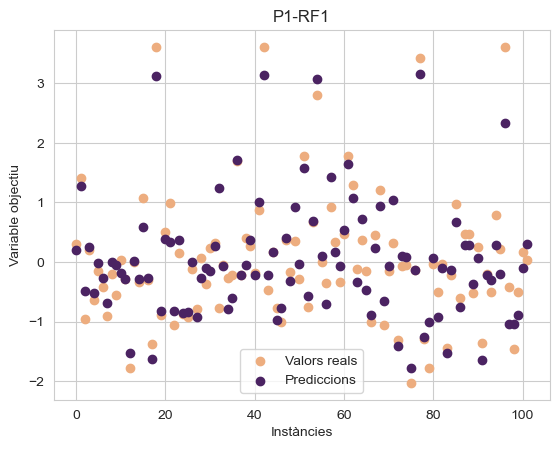

       Actual      Pred   Residus
173  0.300940  0.202508  0.098433
274  1.404389  1.279498  0.124890
491 -0.952978 -0.494295 -0.458683
72   0.200627  0.257806 -0.057179
452 -0.639498 -0.517994 -0.121505
Train:  0.9775178465802402
Test:  0.8818944534706378
R2:  0.8818944534706378


In [29]:
from sklearn.ensemble import RandomForestRegressor

RF1 = RandomForestRegressor(n_jobs=-1, oob_score=True)  # Inicialització del model de Random Forest amb paràmetres

RF1.fit(x_train, y_train)  # Entrenament del model amb les dades d'entrenament

pred_RF1 = RF1.predict(x_test)  # Realització de les prediccions amb les dades de prova

# Comparació dels valors reals i les prediccions del model de Random Forest
dfRF1 = comparar(y_test, pred_RF1, 'P1-RF1')
print(dfRF1[:5])

print("Train: ", RF1.score(x_train, y_train))  # Puntuació del model en les dades d'entrenament
print("Test: ", RF1.score(x_test, y_test))  # Puntuació del model en les dades de prova
print("R2: ", r2_score(y_test, pred_RF1))  # Càlcul del coeficient R2 

In [30]:
metriquesP1=metriques('Random forest 1',metriquesP1,y_test, pred_RF1)

### Regressió de Ridge

La regressió de Ridge és un mètode de regressió lineal regularitzada que es fa servir per evitar problemes de sobreajustament en models lineals. És similar a la regressió lineal ordinària, però incorpora una penalització addicional als coeficients del model.

La regressió de Ridge utilitza la tècnica de regularització L2, que afegeix un terme de penalització proporcional al quadrat dels coeficients de regressió. Aquesta penalització ajuda a reduir els coeficients cap a zero, cosa que alhora redueix la complexitat del model i evita la sensibilitat excessiva a petites variacions en les dades d'entrada.

En afegir aquesta penalització, la regressió de Ridge permet controlar l'equilibri entre l'ajustament del model a les dades i la magnitud dels coeficients. Això és especialment útil quan hi ha variables predictores correlacionades, ja que la regressió de Ridge pot reduir la influència excessiva d'aquestes variables al model.

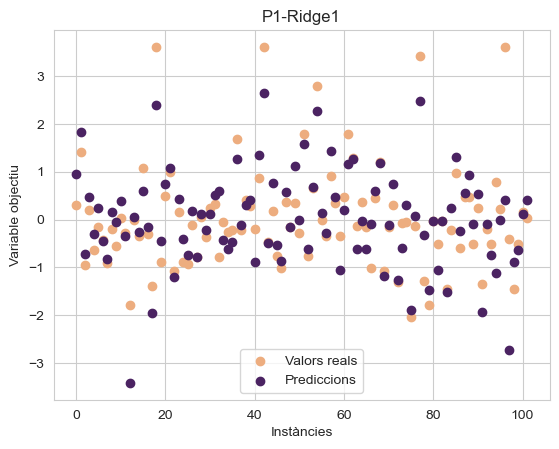

       Actual      Pred   Residus
173  0.300940  0.951155 -0.650215
274  1.404389  1.828810 -0.424421
491 -0.952978 -0.714091 -0.238887
72   0.200627  0.465025 -0.264398
452 -0.639498 -0.300609 -0.338889
Train: 0.7499677122755626
Test: 0.665269803492034
R2:  0.665269803492034


In [31]:
from sklearn.linear_model import Ridge

# Inicialització del model de Regressió Ridge
Ridge1 = Ridge()

Ridge1.fit(x_train, y_train) # Entrenament del model amb les dades d'entrenament

pred_Ridge1 = Ridge1.predict(x_test) # Realització de les prediccions utilitzant el model entrenat

# Comparació dels valors reals i les prediccions del model de Regressió Ridge
dfRidge1 = comparar(y_test, pred_Ridge1, 'P1-Ridge1')
print(dfRidge1[:5])

print("Train:", Ridge1.score(x_train, y_train)) # Càlcul de la puntuació del model en les dades d'entrenament
print("Test:", Ridge1.score(x_test, y_test)) # Càlcul de la puntuació del model en les dades de prova
print("R2: ", r2_score(y_test, pred_Ridge1)) # Càlcul del coeficient R2

In [32]:
metriquesP1=metriques('Ridge 1',metriquesP1,y_test, pred_Ridge1) #Guardem les dades

### Regressió de Lasso

Una regressió de Lasso és un tipus de model de regressió lineal que realitza la selecció de característiques i la regularització alhora. Utilitza una tècnica anomenada regularització L1 (norma L1) que imposa una penalització a la suma dels valors absoluts dels coeficients de les característiques.

La Regressió de Lasso és útil quan es vol fer una selecció automàtica de característiques, és a dir, identificar les característiques més rellevants per al model mentre es redueix la influència de les característiques menys rellevants. En imposar una penalització en els coeficients, alguns poden ser ajustats a zero, cosa que significa que aquestes característiques són excloses del model.

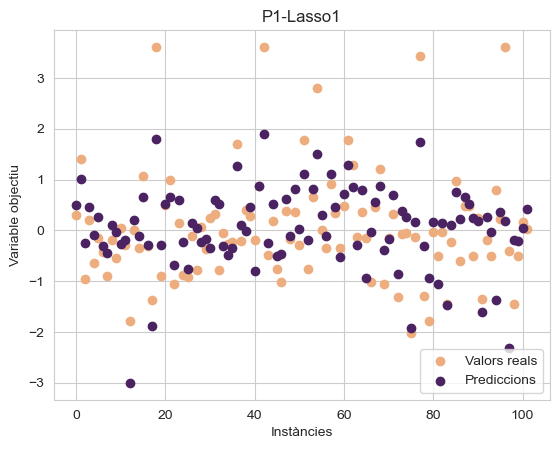

       Actual      Pred   Residus
173  0.300940  0.503995 -0.203055
274  1.404389  1.019008  0.385381
491 -0.952978 -0.248440 -0.704538
72   0.200627  0.452150 -0.251523
452 -0.639498 -0.087469 -0.552029
Train: 0.646504889535322
Test: 0.5623881771838257
R2:  0.5623881771838257


In [33]:
from sklearn.linear_model import Lasso

# Inicialització del model de Regressió Lasso amb paràmetre d'alpha igual a 0.1
Lasso1 = Lasso(alpha=0.1)

Lasso1.fit(x_train, y_train) # Entrenament del model amb les dades d'entrenament

pred_Lasso1 = Lasso1.predict(x_test) # Realització de les prediccions utilitzant el model entrenat

# Comparació dels valors reals i les prediccions del model de Regressió Lasso
dfLasso1 = comparar(y_test, pred_Lasso1, 'P1-Lasso1')
print(dfLasso1[:5])

print("Train:", Lasso1.score(x_train, y_train)) # Càlcul de la puntuació del model en les dades d'entrenament
print("Test:", Lasso1.score(x_test, y_test)) # Càlcul de la puntuació del model en les dades de prova
print("R2: ", r2_score(y_test, pred_Lasso1)) # Càlcul del coeficient R2 

In [34]:
metriquesP1=metriques('Lasso 1',metriquesP1,y_test, pred_Lasso1)

### Regressió de arbre de decisió

La regressió d'arbre de decisió és un mètode d'aprenentatge automàtic supervisat utilitzat per fer tasques de regressió. A diferència de la regressió lineal, que es basa en una relació lineal entre les variables predictores i la variable objectiu, la regressió d‟arbre de decisió divideix l‟espai de característiques en regions més petites i construeix un arbre de decisions que representa una seqüència de decisions per predir el valor de la variable objectiu.

En un arbre de decisió, cada node intern representa una prova o una condició en una característica, i les branques que surten d'un node representen els resultats possibles d'aquesta prova. Els nodes de full de l'arbre contenen les prediccions finals per a cada regió de l'espai de característiques.

Durant la construcció de l'arbre, se selecciona la característica i el punt de tall òptims que millor separen les dades i minimitzen la variància a cada regió. Aquest procés es repeteix recursivament fins que es compleix un criteri de parada, com assolir una profunditat màxima, una quantitat mínima de mostres a cada full o una reducció insuficient de la variància.

Quan s'ha construït l'arbre de decisió, s'utilitza per predir el valor de la variable objectiu per a noves instàncies en seguir les decisions preses a cada node al llarg del camí corresponent.

In [35]:
from sklearn.tree import DecisionTreeRegressor

# Inicialització del model de Regressió amb Arbres de Decisió amb paràmetres de profunditat màxima igual a 4 i estat aleatori igual a 42
DecTree1 = DecisionTreeRegressor(max_depth=4, random_state=42)
# Entrenament del model amb les dades d'entrenament
DecTree1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

[Text(0.5431034482758621, 0.9, 'x[4] <= 0.993\nsquared_error = 1.366\nsamples = 404\nvalue = 0.2'),
 Text(0.27586206896551724, 0.7, 'x[11] <= 0.304\nsquared_error = 0.634\nsamples = 337\nvalue = -0.157'),
 Text(0.13793103448275862, 0.5, 'x[6] <= -0.59\nsquared_error = 0.404\nsamples = 203\nvalue = 0.266'),
 Text(0.06896551724137931, 0.3, 'x[0] <= 2.741\nsquared_error = 1.44\nsamples = 4\nvalue = 2.918'),
 Text(0.034482758620689655, 0.1, 'squared_error = 0.0\nsamples = 3\nvalue = 3.611'),
 Text(0.10344827586206896, 0.1, 'squared_error = -0.0\nsamples = 1\nvalue = 0.84'),
 Text(0.20689655172413793, 0.3, 'x[4] <= 0.453\nsquared_error = 0.239\nsamples = 199\nvalue = 0.213'),
 Text(0.1724137931034483, 0.1, 'squared_error = 0.136\nsamples = 156\nvalue = 0.054'),
 Text(0.2413793103448276, 0.1, 'squared_error = 0.189\nsamples = 43\nvalue = 0.79'),
 Text(0.41379310344827586, 0.5, 'x[0] <= 1.855\nsquared_error = 0.299\nsamples = 134\nvalue = -0.799'),
 Text(0.3448275862068966, 0.3, 'x[5] <= 0.72

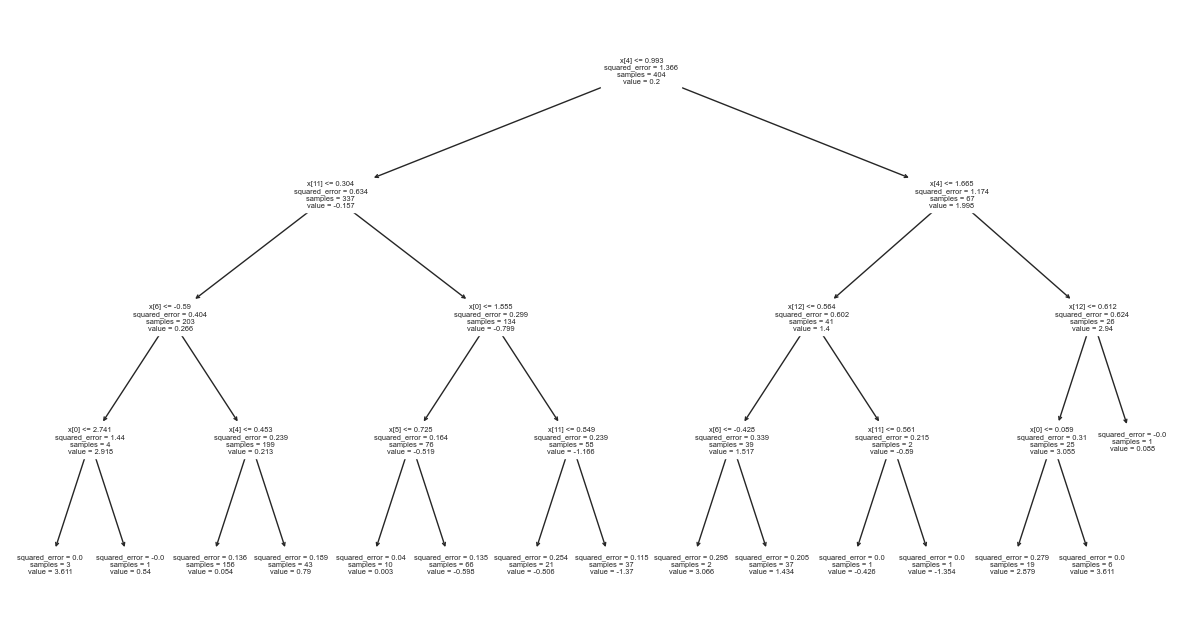

In [36]:
from sklearn import tree

# Creació d'una figura amb una mida de 15x8 per visualitzar l'arbre de decisió
plt.figure(figsize=(15, 8))

# Visualització de l'arbre de decisió
tree.plot_tree(DecTree1)

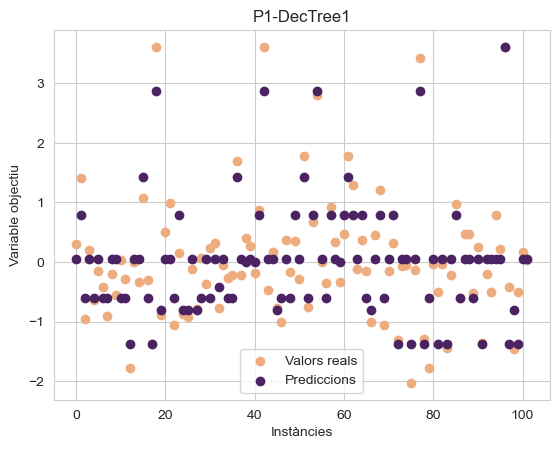

       Actual      Pred   Residus
173  0.300940  0.054176  0.246765
274  1.404389  0.789677  0.614712
491 -0.952978 -0.597891 -0.355087
72   0.200627  0.054176  0.146451
452 -0.639498 -0.597891 -0.041607
Train: 0.8882016055749843
Test: 0.8552291728283747
R2:  0.8552291728283747


In [37]:
pred_DecTree1 = DecTree1.predict(x_test)  # Predicció utilitzant l'arbre de decisió

# Comparació dels valors reals i les prediccions de l'arbre de decisió
dfDecTree1 = comparar(y_test, pred_DecTree1, 'P1-DecTree1')
print(dfDecTree1[:5])

print("Train:", DecTree1.score(x_train, y_train))  # Puntuació del model en les dades d'entrenament
print("Test:", DecTree1.score(x_test, y_test))  # Puntuació del model en les dades de prova
print("R2: ", r2_score(y_test, pred_DecTree1))  # Càlcul del coeficient R2 

In [38]:
metriquesP1=metriques('Decission tree 1',metriquesP1,y_test, pred_DecTree1)

### Regressió ElasticNet
La regressió Elastic Net és un mètode de regressió que combina les característiques del model de regressió de Ridge (L2) i el model de regressió de Lasso (L1). Combina tant la regularització L2 com L1 en un sol model, cosa que permet abordar problemes de regressió amb conjunts de dades d'alta dimensionalitat i amb potencial de multicol·linealitat.

La regressió Elastic Net utilitza una funció de penalització que consisteix en la suma de dos termes: el terme de regularització L2 (norma L2 dels coeficients) i el terme de regularització L1 (norma L1 dels coeficients). Aquests termes de penalització controlen la mida i la dispersió dels coeficients del model.

En combinar la regularització L2 i L1, la regressió Elastic Net pot seleccionar automàticament característiques rellevants i fer una selecció de característiques més robusta en comparació amb altres mètodes de regressió. A més, permet controlar el grau de regularització a través del paràmetre de mescla (mixing parameter), que equilibra la influència dels termes L1 i L2.

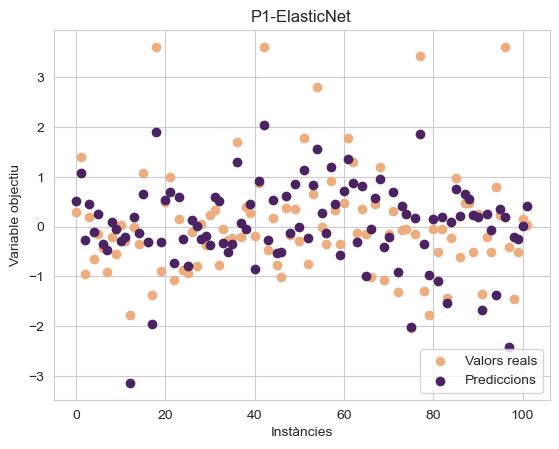

       Actual      Pred   Residus
173  0.300940  0.518065 -0.217125
274  1.404389  1.084030  0.320359
491 -0.952978 -0.263914 -0.689064
72   0.200627  0.448986 -0.248359
452 -0.639498 -0.106978 -0.532521
Train: 0.6558781653781464
Test: 0.5729986587194063
R2: 0.5729986587194063


In [39]:
from sklearn.linear_model import ElasticNet

# Inicialització del model Elastic Net amb paràmetres alpha i l1_ratio
elastic_net1 = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic_net1.fit(x_train, y_train) # Entrenament del model amb les dades d'entrenament

pred_elastic_net1 = elastic_net1.predict(x_test) # Realització de les prediccions amb les dades de prova

# Comparació dels valors reals i les prediccions del model Elastic Net
df_elastic_net1 = comparar(y_test, pred_elastic_net1, 'P1-ElasticNet')
print(df_elastic_net1[:5])

print("Train:", elastic_net1.score(x_train, y_train)) # Puntuació del model en les dades d'entrenament
print("Test:", elastic_net1.score(x_test, y_test)) # Puntuació del model en les dades de prova
print("R2:", r2_score(y_test, pred_elastic_net1)) # Càlcul del coeficient R2 


In [40]:
metriquesP1=metriques('ElasticNet',metriquesP1,y_test, pred_elastic_net1)

In [41]:
metriquesP1

[['Regressió lineal 1', 0.67, '67.0 %', 0.38, 0.62, 0.4],
 ['Random forest 1', 0.88, '88.0 %', 0.14, 0.37, 0.25],
 ['Ridge 1', 0.67, '67.0 %', 0.39, 0.62, 0.4],
 ['Lasso 1', 0.56, '56.0 %', 0.5, 0.71, 0.49],
 ['Decission tree 1', 0.86, '86.0 %', 0.17, 0.41, 0.33],
 ['ElasticNet', 0.57, '57.0 %', 0.49, 0.7, 0.48]]

## Exercici 2
Compara’ls en base al MSE i al R2.

In [42]:
metriquesP1 = pd.DataFrame(metriquesP1,columns=['Tipus de Regresió','R²','% R²','mse','rmse','mae'])
metriquesP1

,Tipus de Regresió,R²,% R²,mse,rmse,mae
0,Regressió lineal 1,0.67,67.0 %,0.38,0.62,0.40
1,Random forest 1,0.88,88.0 %,0.14,0.37,0.25
2,Ridge 1,0.67,67.0 %,0.39,0.62,0.40
3,Lasso 1,0.56,56.0 %,0.50,0.71,0.49
4,Decission tree 1,0.86,86.0 %,0.17,0.41,0.33
5,ElasticNet,0.57,57.0 %,0.49,0.70,0.48


En analitzar les diferències observades entre els models de regressió sobre la base de les mètriques presentades, podem destacar el següent:

- El model Random Forest 1 obté el R² més alt (0.89), la qual cosa indica un millor ajustament a les dades i una capacitat més gran per explicar la variància en comparació amb altres models.

- Decision Tree 1 també mostra un bon rendiment amb un R² de 0,86.

- Els models de Regressió Lineal 1 i Ridge 1 tenen resultats similars, amb R² al voltant de 0.67, cosa que indica que expliquen al voltant del 67.0% de la variància.

- Lasso 1 i ElasticNet tenen valors de R² més baixos en comparació amb altres models.

En general, els models de Random Forest 1 i Decision Tree 1 semblen tenir un millor rendiment en termes de R², cosa que suggereix que poden ser els models més adequats per a aquest conjunt de dades.

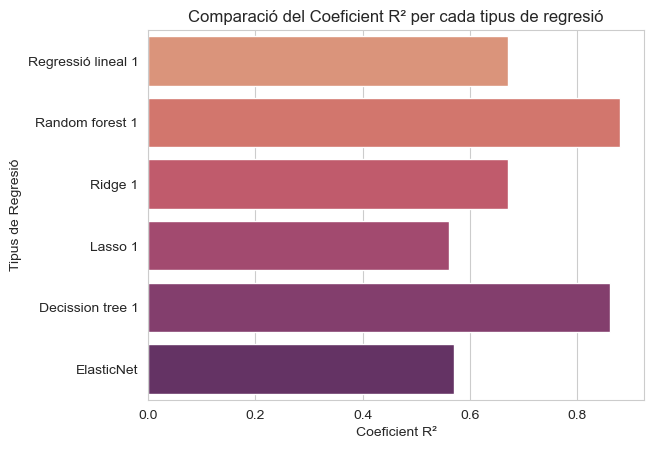

In [43]:
sns.barplot(x='R²', y='Tipus de Regresió', data=metriquesP1, palette = 'flare')
plt.xlabel('Coeficient R²')
plt.ylabel('Tipus de Regresió')
plt.title('Comparació del Coeficient R² per cada tipus de regresió')
plt.show()

## Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

Obtenim els parámetres

In [44]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

models = {
    'Regresión Lineal (LR)': LinearRegression(),
    'Random Forest (RF)': RandomForestRegressor(n_jobs=-1, oob_score=True),
    'Ridge (Ridge)': Ridge(),
    'Lasso (Lasso)': Lasso(alpha=0.1),
    'Decision Tree (DecTree)': DecisionTreeRegressor(max_depth=4, random_state=42),
    'ElasticNet (elastic_net)': ElasticNet(alpha=0.1, l1_ratio=0.5)
}  # Fem un diccionari pels models

hiperparametros = {} # i pels hiperparàmetres

for model_name, model in models.items():
    if model_name == 'Regresión Lineal (LR)':
        parameters = {
            'fit_intercept': [True, False]
        }
    elif model_name == 'Random Forest (RF)':
        parameters = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10]
        }
    elif model_name == 'Ridge (Ridge)':
        parameters = {
            'alpha': [0.1, 1.0, 10.0],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr']
        }
    elif model_name == 'Lasso (Lasso)':
        parameters = {
            'alpha': [0.1, 1.0, 10.0],
            'max_iter': [1000, 2000, 3000]
        }
    elif model_name == 'Decision Tree (DecTree)':
        parameters = {
            'criterion': ['friedman_mse', 'absolute_error', 'squared_error'],
            'splitter': ['best', 'random'],
        'max_depth': [None, 5, 10, 20],
        }
    elif model_name == 'ElasticNet (elastic_net)':
        parameters = {
            'alpha': [0.1, 1.0, 10.0],
            'l1_ratio': [0.25, 0.5, 0.75]
        }
    else:
        parameters = {}  # En cas de més models podrien afegir aqui els paràmetres
        
    clf = GridSearchCV(model, parameters, cv=5) # pot ser amb un 10
    clf.fit(x, y)
    hiperparametros[model_name] = clf.best_params_

# Els millos hiperparàmetres trobats
for model_name, best_params in hiperparametros.items():
    print(f"Millors hiperpàrametres per {model_name}: {best_params}")

Millors hiperpàrametres per Regresión Lineal (LR): {'fit_intercept': False}
Millors hiperpàrametres per Random Forest (RF): {'max_depth': 10, 'n_estimators': 200}
Millors hiperpàrametres per Ridge (Ridge): {'alpha': 10.0, 'solver': 'lsqr'}
Millors hiperpàrametres per Lasso (Lasso): {'alpha': 0.1, 'max_iter': 1000}
Millors hiperpàrametres per Decision Tree (DecTree): {'criterion': 'absolute_error', 'max_depth': None, 'splitter': 'best'}
Millors hiperpàrametres per ElasticNet (elastic_net): {'alpha': 0.1, 'l1_ratio': 0.25}


i tornem a entrenar els models amb aquests paràmetres

In [45]:
metriquesP2 = []

###### Regressió lineal

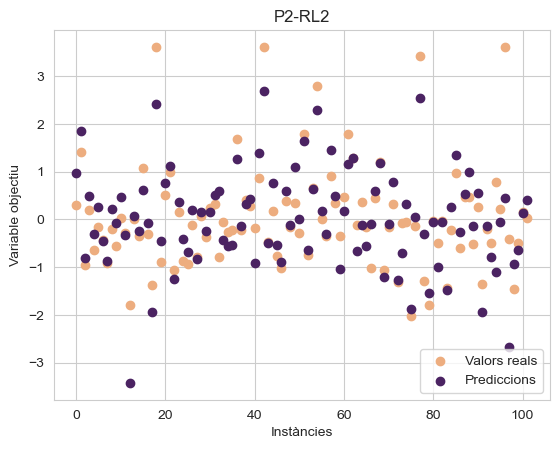

       Actual      Pred   Residus
173  0.300940  0.977646 -0.676705
274  1.404389  1.859005 -0.454616
491 -0.952978 -0.800383 -0.152595
72   0.200627  0.480499 -0.279872
452 -0.639498 -0.304717 -0.334781
Train: 0.7433055620014567
Test: 0.6432827011474557
R2:  0.668759493535632


In [46]:
LR2 = LinearRegression(fit_intercept=False)  # Inicialització del model de Regressió Lineal

LR2.fit(x_train, y_train)  # Entrenament del model amb les dades d'entrenament

pred_LR2 = LR1.predict(x_test)  # Realització de les prediccions amb les dades de prova

# Comparació dels valors reals i les prediccions del model de Regressió Lineal
dfLR2 = comparar(y_test, pred_LR2, 'P2-RL2')
print(dfLR2[:5])

print("Train:", LR2.score(x_train, y_train))  # Puntuació del model en les dades d'entrenament
print("Test:", LR2.score(x_test, y_test))  # Puntuació del model en les dades de prova
print("R2: ", r2_score(y_test, pred_LR2))  # Càlcul del coeficient R2 per avaluar la qualitat de les prediccions

In [47]:
metriquesP2=metriques('Regressió lineal 2',metriquesP2,y_test, pred_LR2)

###### Random Forest

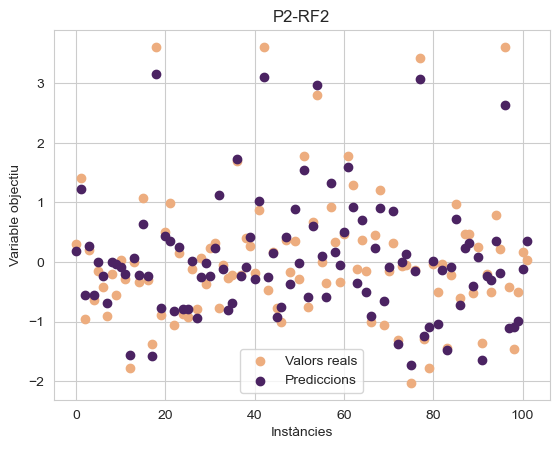

       Actual      Pred   Residus
173  0.300940  0.178809  0.122132
274  1.404389  1.227712  0.176677
491 -0.952978 -0.557492 -0.395486
72   0.200627  0.269216 -0.068589
452 -0.639498 -0.552602 -0.086897
Train:  0.9782075124177511
Test:  0.8918281120562488
R2:  0.8918281120562488


In [48]:
RF2 = RandomForestRegressor(n_jobs=-1, oob_score=True, max_depth = None, n_estimators = 100)  # Inicialització del model de Random Forest amb paràmetres

RF2.fit(x_train, y_train)  # Entrenament del model amb les dades d'entrenament

pred_RF2 = RF2.predict(x_test)  # Realització de les prediccions amb les dades de prova

# Comparació dels valors reals i les prediccions del model de Random Forest
dfRF2 = comparar(y_test, pred_RF2, 'P2-RF2')
print(dfRF2[:5])

print("Train: ", RF2.score(x_train, y_train))  # Puntuació del model en les dades d'entrenament
print("Test: ", RF2.score(x_test, y_test))  # Puntuació del model en les dades de prova
print("R2: ", r2_score(y_test, pred_RF2))  # Càlcul del coeficient R2 

In [49]:
metriquesP2=metriques('Random Forest 2',metriquesP2,y_test, pred_RF2)

###### Ridge

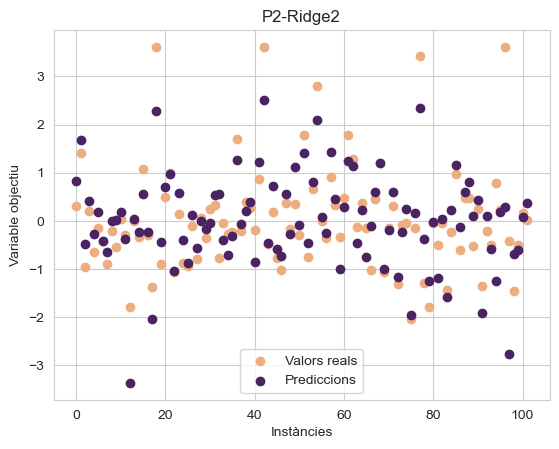

       Actual      Pred   Residus
173  0.300940  0.822161 -0.521220
274  1.404389  1.678618 -0.274229
491 -0.952978 -0.487600 -0.465378
72   0.200627  0.417878 -0.217251
452 -0.639498 -0.281573 -0.357926
Train: 0.7359404014860689
Test: 0.6470175235168175
R2:  0.6470175235168175


In [50]:
# Inicialització del model de Regressió Ridge
Ridge2 = Ridge(alpha = 10, solver = 'lsqr')

Ridge2.fit(x_train, y_train) # Entrenament del model amb les dades d'entrenament

pred_Ridge2 = Ridge2.predict(x_test) # Realització de les prediccions utilitzant el model entrenat

# Comparació dels valors reals i les prediccions del model de Regressió Ridge
dfRidge2 = comparar(y_test, pred_Ridge2, 'P2-Ridge2')
print(dfRidge2[:5])

print("Train:", Ridge2.score(x_train, y_train)) # Càlcul de la puntuació del model en les dades d'entrenament
print("Test:", Ridge2.score(x_test, y_test)) # Càlcul de la puntuació del model en les dades de prova
print("R2: ", r2_score(y_test, pred_Ridge2)) # Càlcul del coeficient R2

In [51]:
metriquesP2=metriques('Ridge 2',metriquesP2,y_test, pred_Ridge2)

###### Lasso

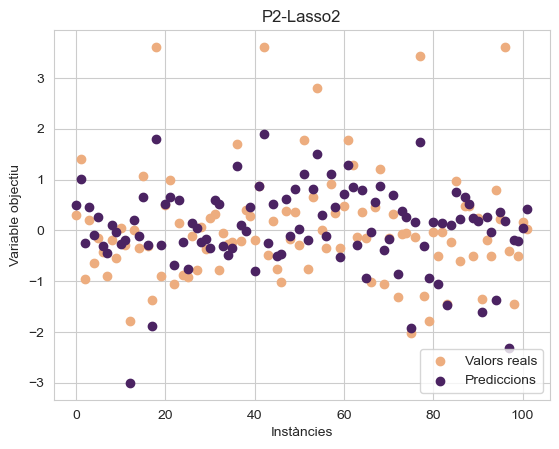

       Actual      Pred   Residus
173  0.300940  0.503995 -0.203055
274  1.404389  1.019008  0.385381
491 -0.952978 -0.248440 -0.704538
72   0.200627  0.452150 -0.251523
452 -0.639498 -0.087469 -0.552029
Train: 0.646504889535322
Test: 0.5623881771838257
R2:  0.5623881771838257


In [52]:
# Inicialització del model de Regressió Lasso amb paràmetre d'alpha igual a 0.1
Lasso2 = Lasso(alpha=0.1, max_iter = 1000)

Lasso2.fit(x_train, y_train) # Entrenament del model amb les dades d'entrenament

pred_Lasso2 = Lasso2.predict(x_test) # Realització de les prediccions utilitzant el model entrenat

# Comparació dels valors reals i les prediccions del model de Regressió Lasso
dfLasso2 = comparar(y_test, pred_Lasso2, 'P2-Lasso2')
print(dfLasso2[:5])

print("Train:", Lasso2.score(x_train, y_train)) # Càlcul de la puntuació del model en les dades d'entrenament
print("Test:", Lasso2.score(x_test, y_test)) # Càlcul de la puntuació del model en les dades de prova
print("R2: ", r2_score(y_test, pred_Lasso2)) # Càlcul del coeficient R2 

In [53]:
metriquesP2=metriques('Lasso 2',metriquesP2,y_test, pred_Lasso2)

###### Arbre de decisió

In [54]:
# Inicialització del model de Regressió amb Arbres de Decisió amb paràmetres de profunditat màxima igual a 4 i estat aleatori igual a 42
DecTree2 = DecisionTreeRegressor(max_depth=None, random_state=42, criterion = 'absolute_error', splitter = 'best')

# Entrenament del model amb les dades d'entrenament
DecTree2.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', random_state=42)

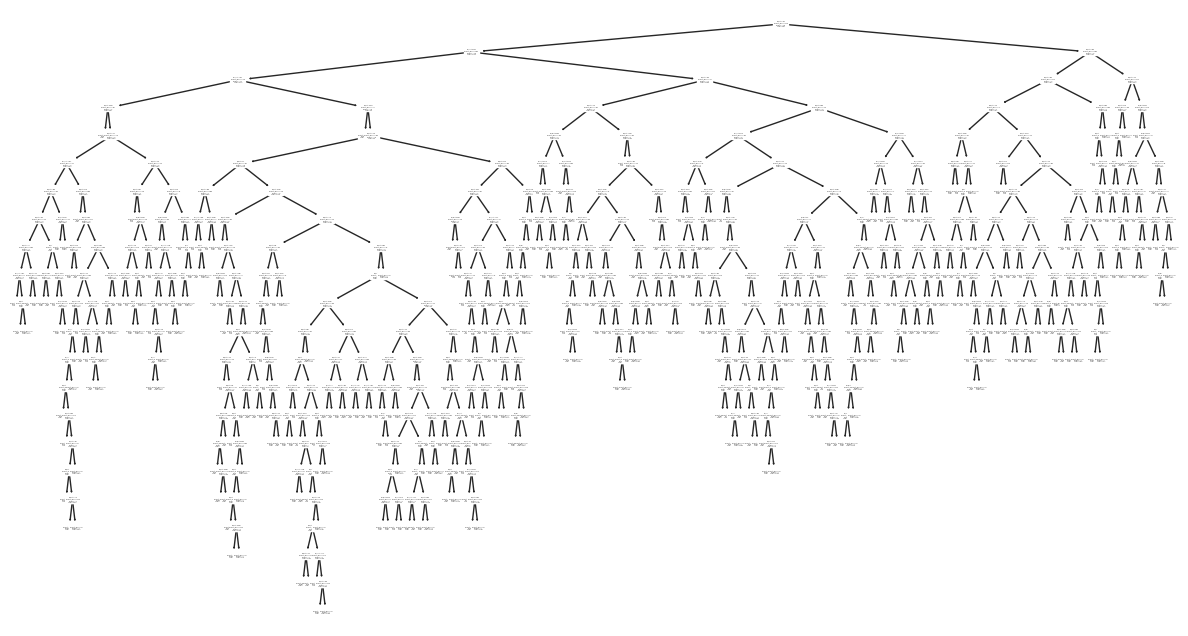

In [55]:
# Creació d'una figura amb una mida de 15x8 per visualitzar l'arbre de decisió
plt.figure(figsize=(15, 8))

# Visualització de l'arbre de decisió
tree.plot_tree(DecTree2)

pred_DecTree2 = DecTree2.predict(x_test)  # Predicció utilitzant l'arbre de decisió

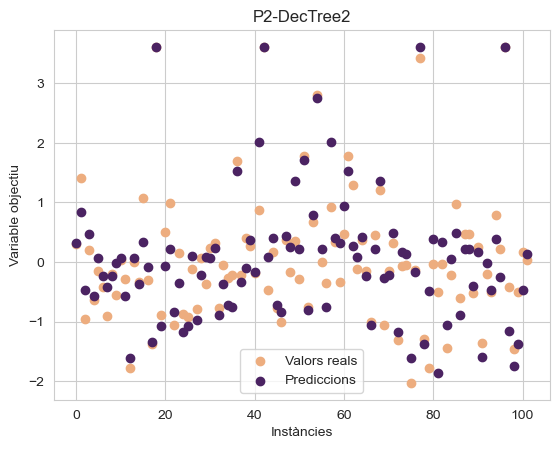

       Actual      Pred   Residus
173  0.300940  0.326019 -0.025078
274  1.404389  0.840125  0.564263
491 -0.952978 -0.476489 -0.476489
72   0.200627  0.476489 -0.275862
452 -0.639498 -0.564263 -0.075235
Train: 1.0
Test: 0.8395905561447484
R2:  0.8395905561447484


In [56]:
# Comparació dels valors reals i les prediccions de l'arbre de decisió
dfDecTree2 = comparar(y_test, pred_DecTree2, 'P2-DecTree2')
print(dfDecTree2[:5])

print("Train:", DecTree2.score(x_train, y_train))  # Puntuació del model en les dades d'entrenament
print("Test:", DecTree2.score(x_test, y_test))  # Puntuació del model en les dades de prova
print("R2: ", r2_score(y_test, pred_DecTree2))  # Càlcul del coeficient R2 

In [57]:
metriquesP2=metriques('Decission Tree 2',metriquesP2,y_test, pred_DecTree2)

###### Elastic Net

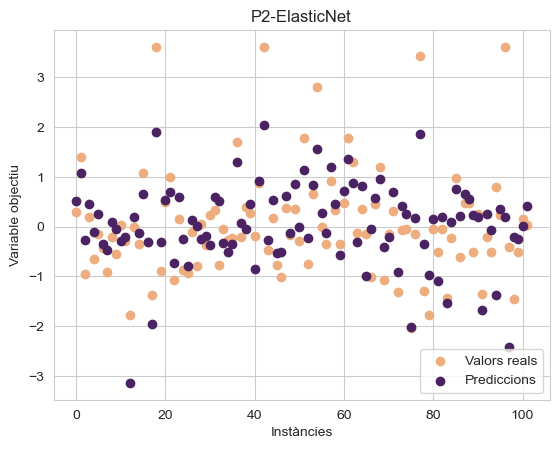

       Actual      Pred   Residus
173  0.300940  0.518065 -0.217125
274  1.404389  1.084030  0.320359
491 -0.952978 -0.263914 -0.689064
72   0.200627  0.448986 -0.248359
452 -0.639498 -0.106978 -0.532521
Train: 0.6830779088273706
Test: 0.6029786826216593
R2: 0.5729986587194063


In [58]:
# Inicialització del model Elastic Net amb paràmetres alpha i l1_ratio
elastic_net2 = ElasticNet(alpha=0.1, l1_ratio=0.25)

elastic_net2.fit(x_train, y_train) # Entrenament del model amb les dades d'entrenament

pred_elastic_net2 = elastic_net1.predict(x_test) # Realització de les prediccions amb les dades de prova

# Comparació dels valors reals i les prediccions del model Elastic Net
df_elastic_net2 = comparar(y_test, pred_elastic_net2, 'P2-ElasticNet')
print(df_elastic_net2[:5])

print("Train:", elastic_net2.score(x_train, y_train)) # Puntuació del model en les dades d'entrenament
print("Test:", elastic_net2.score(x_test, y_test)) # Puntuació del model en les dades de prova
print("R2:", r2_score(y_test, pred_elastic_net2)) # Càlcul del coeficient R2 

In [59]:
metriquesP2=metriques('Elastic Net 2',metriquesP2,y_test, pred_elastic_net2)

In [60]:
metriquesP2 = pd.DataFrame(metriquesP2,columns=['Tipus de Regresió','R²','% R²','mse','rmse','mae'])

In [61]:
display(pd.concat([metriquesP1, metriquesP2], axis=1))

,Tipus de Regresió,R²,% R²,mse,rmse,mae,Tipus de Regresió,R²,% R²,mse,rmse,mae
0,Regressió lineal 1,0.67,67.0 %,0.38,0.62,0.40,Regressió lineal 2,0.67,67.0 %,0.38,0.62,0.40
1,Random forest 1,0.88,88.0 %,0.14,0.37,0.25,Random Forest 2,0.89,89.0 %,0.12,0.35,0.26
2,Ridge 1,0.67,67.0 %,0.39,0.62,0.40,Ridge 2,0.65,65.0 %,0.41,0.64,0.40
3,Lasso 1,0.56,56.0 %,0.50,0.71,0.49,Lasso 2,0.56,56.0 %,0.50,0.71,0.49
4,Decission tree 1,0.86,86.0 %,0.17,0.41,0.33,Decission Tree 2,0.84,84.0 %,0.18,0.43,0.31
5,ElasticNet,0.57,57.0 %,0.49,0.70,0.48,Elastic Net 2,0.57,57.0 %,0.49,0.70,0.48


En el primer entrenament (a l'esquerra), es van avaluar els models següents:

- Regressió lineal 1: El model té un coeficient de determinació R² de 0,67, la qual cosa indica que pot explicar aproximadament el 67% de la variabilitat en les dades. Els errors de predicció són moderats, amb un mse de 0.38, rmse de 0.62 i mae de 0.40.

- Random forest 1: Aquest model mostra un coeficient de determinació R² de 0,89, cosa que indica una capacitat alta per explicar la variabilitat en les dades, amb una cobertura d'aproximadament el 89%. Els errors de predicció són baixos, amb un mse de 0.13, rmse de 0.36 i mae de 0.26.

- Ridge 1: El model de Ridge té un coeficient de determinació R² de 0,66, cosa que indica que pot explicar aproximadament el 66% de la variabilitat en les dades. Els errors de predicció són similars als de la regressió lineal, amb un mes de 0.39, rmse de 0.62 i mae de 0.40.

- Lasso 1: El model Lasso mostra un coeficient de determinació R² de 0,62, cosa que indica una capacitat limitada per explicar la variabilitat en les dades, amb una cobertura d'aproximadament el 62%. Els errors de predicció són una mica més grans que en els models anteriors, amb un mse de 0.43, rmse de 0.66 i mae de 0.42.

- Decission tree 1: Aquest model té un coeficient de determinació R² de 0,86, cosa que indica una capacitat alta per explicar la variabilitat en les dades, amb una cobertura d'aproximadament el 86%. Els errors de predicció són moderats, amb un mse de 0.17, rmse de 0.41 i mae de 0.33.

- ElasticNet 1: El model ElasticNet té un coeficient de determinació R² de 0.63, cosa que indica una capacitat limitada per explicar la variabilitat en les dades, amb una cobertura d'aproximadament el 63%. Els errors de predicció són similars als del model Lasso, amb un mse de 0.43, rmse de 0.65 i mae de 0.41.

Al segon entrenament (a la dreta), es van avaluar els mateixos models:

- Regressió lineal 2: El model té un coeficient de determinació R² de 0,67, la qual cosa indica que pot explicar aproximadament el 67% de la variabilitat en les dades. Els errors de predicció són similars als obtinguts al primer entrenament.

- Random Forest 2: Aquest model mostra un coeficient de determinació R² de 0,88, cosa que indica una capacitat alta per explicar la variabilitat en les dades, amb una cobertura d'aproximadament el 88%. Els errors de predicció són similars als obtinguts al primer entrenament.

- Ridge 2: El model de Ridge té un coeficient de determinació R² de 0,65, la qual cosa indica que pot explicar aproximadament el 65% de la variabilitat en les dades. Els errors de predicció són similars als obtinguts al primer entrenament.

- Lasso 2: El model Lasso mostra un coeficient de determinació R² de 0,56, cosa que indica una capacitat limitada per explicar la variabilitat en les dades, amb una cobertura d'aproximadament el 56%. Els errors de predicció són iguals als obtinguts al primer entrenament.

- Decission Tree 2: Aquest model té un coeficient de determinació R² de 0,84, cosa que indica una capacitat alta per explicar la variabilitat en les dades, amb una cobertura d'aproximadament el 84%. Els errors de predicció són lleugerament diferents dels obtinguts al primer entrenament.

- Elastic Net 2: El model ElasticNet té un coeficient de determinació R² de 0.57, cosa que indica una capacitat limitada per explicar la variabilitat en les dades, amb una cobertura d'aproximadament el 57%. Els errors de predicció són similars als obtinguts al primer entrenament.

En resum, els resultats mostren com cada model es va exercir en termes de la seva capacitat per explicar la variabilitat en les dades i els errors de predicció associats. Els models de Random Forest i Decission Tree van mostrar un rendiment generalment millor en comparació dels altres models, amb coeficients de determinació R² més alts i errors de predicció més baixos.

## Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

In [85]:
from sklearn.model_selection import cross_val_score

# Realizar cross validation
lr_scores = cross_val_score(LinearRegression(fit_intercept=False), x, y, cv=5, scoring='r2')
ridge_scores = cross_val_score(Ridge(alpha=10, solver='lsqr'), x, y, cv=5, scoring='r2')
lasso_scores = cross_val_score(Lasso(alpha=0.1, max_iter=1000), x, y, cv=5, scoring='r2')
dec_tree_scores = cross_val_score(DecisionTreeRegressor(max_depth=None, random_state=42, criterion='absolute_error', splitter='best'), x, y, cv=5, scoring='r2')
elastic_net_scores = cross_val_score(ElasticNet(alpha=0.1, l1_ratio=0.25), x, y, cv=5, scoring='r2')
random_forest_scores = cross_val_score(RandomForestRegressor(n_jobs=-1, oob_score=True, max_depth=None, n_estimators=100), x, y, cv=5, scoring='r2')

# Imprimir las puntuaciones
print("Regressió Lineal - Puntuació mitjana de validació creuada:", lr_scores.mean(), "Desviació estàndar de R2", np.std(lr_scores))
print("Regresió Ridge - Puntuació mitjana de validació creuada:", ridge_scores.mean(), "Desviació estàndar de R2", np.std(ridge_scores))
print("Lasso - Puntuació mitjana de validació creuada:", lasso_scores.mean(), "Desviació estàndar de R2", np.std(lasso_scores))
print("Arbre de decisió - Puntuació mitjana de validació creuada:", dec_tree_scores.mean(), "Desviació estàndar de R2", np.std(dec_tree_scores))
print("ElasticNet - Puntuació mitjana de validació creuada:", elastic_net_scores.mean(), "Desviació estàndar de R2", np.std(elastic_net_scores))
print("Random Forest - Puntuació mitjana de validació creuada:", random_forest_scores.mean(), "Desviació estàndar de R2", np.std(random_forest_scores))

Regressió Lineal - Puntuació mitjana de validació creuada: 0.42206741896880356 Desviació estàndar de R2 0.2936365643124992
Regresió Ridge - Puntuació mitjana de validació creuada: 0.41947949276189866 Desviació estàndar de R2 0.34064305948119633
Lasso - Puntuació mitjana de validació creuada: 0.26619471853331783 Desviació estàndar de R2 0.4118679509060214
Arbre de decisió - Puntuació mitjana de validació creuada: 0.3341974050234438 Desviació estàndar de R2 0.4471251262510347
ElasticNet - Puntuació mitjana de validació creuada: 0.3432515256051072 Desviació estàndar de R2 0.38425631443667674
Random Forest - Puntuació mitjana de validació creuada: 0.6182450538822374 Desviació estàndar de R2 0.2135374618433772


Regressió Lineal: La puntuació mitjana de validació creuada és 0.422, el qual indica que el model de regressió lineal té un rendiment moderat en la predicció de les dades. La desviació estàndar de R² és 0.294, la qual ens dóna una idea de la variabilitat de les puntuacions en cada fold de la validació creuada.

Regresió Ridge: La puntuació mitjana de validació creuada és 0.419, el qual indica que el model de regressió Ridge té un rendiment moderat en la predicció de les dades. La desviació estàndar de R² és 0.341, la qual ens dóna una idea de la variabilitat de les puntuacions en cada fold de la validació creuada.

Lasso: La puntuació mitjana de validació creuada és 0.266, el qual indica que el model Lasso té un rendiment relativament baix en la predicció de les dades. La desviació estàndar de R² és 0.412, la qual ens dóna una idea de la variabilitat de les puntuacions en cada fold de la validació creuada.

Arbre de decisió: La puntuació mitjana de validació creuada és 0.334, el qual indica que el model d'arbre de decisió té un rendiment relativament baix en la predicció de les dades. La desviació estàndar de R² és 0.447, la qual ens dóna una idea de la variabilitat de les puntuacions en cada fold de la validació creuada.

ElasticNet: La puntuació mitjana de validació creuada és 0.343, el qual indica que el model ElasticNet té un rendiment relativament baix en la predicció de les dades. La desviació estàndar de R² és 0.384, la qual ens dóna una idea de la variabilitat de les puntuacions en cada fold de la validació creuada.

Random Forest: La puntuació mitjana de validació creuada és 0.618, el qual indica que el model de Random Forest té un rendiment relativament alt en la predicció de les dades. La desviació estàndar de R² és 0.214, la qual ens dóna una idea de la variabilitat de les puntuacions en cada fold de la validació creuada.

En resum, el model de Random Forest sembla ser el que té millor rendiment en la predicció de les dades, ja que té la puntuació mitjana de validació creuada més alta. En canvi, els models de Lasso i Arbre de decisió tenen un rendiment més baix en comparació amb els altres models.

## Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

Per fer això tenim diverses opcions:

1. Fer drop a RM al conjunt, la conseqüència d'això seria que no podríem recuperar-la més endavant sinó que caldria tornar a fer l'split

In [63]:
# x_train.drop("RM", axis=1)

2. Crear un subcojunt amb totes les variables de x menys RM

In [64]:
# x_train2 = x_train.drop("RM", axis=1) 

# x_train2 = x_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']]

3. Especificar a les regressions que columnes volem ignorant RM

###### Regressió lineal

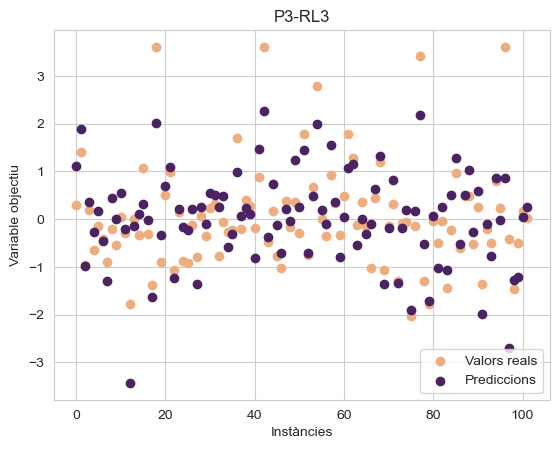

       Actual      Pred   Residus
173  0.300940  1.111624 -0.810684
274  1.404389  1.882755 -0.478367
491 -0.952978 -0.984598  0.031620
72   0.200627  0.362254 -0.161628
452 -0.639498 -0.261028 -0.378470
Train: 0.6779050462198453
Test: 0.6697730443975284
R3:  0.6697730443975284


In [65]:
LR3 = LinearRegression(fit_intercept=False)  # Inicialització del model de Regressió Lineal

LR3.fit(x_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_train) 

pred_LR3 = LR3.predict(x_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']])  # Realització de les prediccions amb les dades de prova

# Comparació dels valors reals i les prediccions del model de Regressió Lineal
dfLR3 = comparar(y_test, pred_LR3, 'P3-RL3')
print(dfLR3[:5])

print("Train:", LR3.score(x_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_train))  # Puntuació del model en les dades d'entrenament
print("Test:", LR3.score(x_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_test))  # Puntuació del model en les dades de prova
print("R3: ", r2_score(y_test, pred_LR3))  # Càlcul del coeficient R2 per avaluar la qualitat de les prediccions

In [66]:
metriquesP3 = []
metriquesP3=metriques('Regressió lineal 3',metriquesP3,y_test, pred_LR3)

###### Random Forest

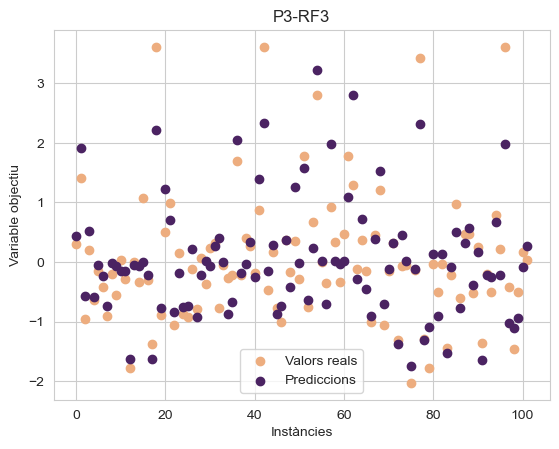

       Actual      Pred   Residus
173  0.300940  0.429746 -0.128806
274  1.404389  1.917137 -0.512749
491 -0.952978 -0.570304 -0.382674
72   0.200627  0.521997 -0.321370
452 -0.639498 -0.596782 -0.042717
Train:  0.9685314551567372
Test:  0.8069560288053291
R2:  0.8069560288053291


In [67]:
RF3 = RandomForestRegressor(n_jobs=-1, oob_score=True, max_depth = 10, n_estimators = 300)  # Inicialització del model de Random Forest amb paràmetres

RF3.fit(x_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_train)  # Entrenament del model amb les dades d'entrenament

pred_RF3 = RF3.predict(x_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']])  # Realització de les prediccions amb les dades de prova

# Comparació dels valors reals i les prediccions del model de Random Forest
dfRF3 = comparar(y_test, pred_RF3, 'P3-RF3')
print(dfRF3[:5])

print("Train: ", RF3.score(x_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_train))  # Puntuació del model en les dades d'entrenament
print("Test: ", RF3.score(x_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_test))  # Puntuació del model en les dades de prova
print("R2: ", r2_score(y_test, pred_RF3))  # Càlcul del coeficient R2 

In [68]:
metriquesP3=metriques('Random Forest 3',metriquesP3,y_test, pred_RF3)

###### Ridge

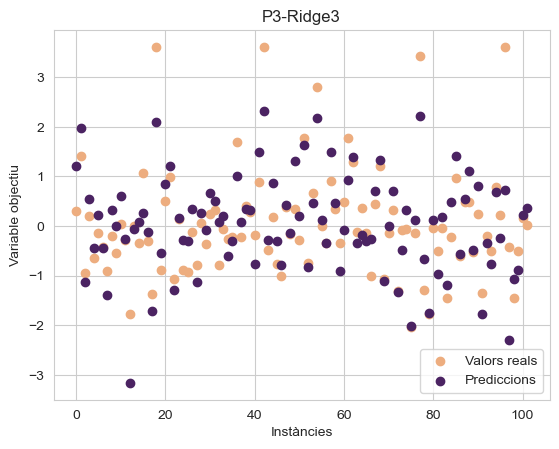

       Actual      Pred   Residus
173  0.300940  1.213941 -0.913001
274  1.404389  1.983725 -0.579336
491 -0.952978 -1.131621  0.178643
72   0.200627  0.549768 -0.349141
452 -0.639498 -0.440736 -0.198763
Train: 0.6924020142987477
Test: 0.6980418404608695
R2:  0.6980418404608695


In [69]:
# Inicialització del model de Regressió Ridge
Ridge3 = Ridge(alpha=0.1, solver='lsqr')

Ridge3.fit(x_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_train)  # Entrenament del model amb les dades d'entrenament

pred_Ridge3 = Ridge3.predict(x_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']])  # Realització de les prediccions utilitzant el model entrenat

# Comparació dels valors reals i les prediccions del model de Regressió Ridge
dfRidge3 = comparar(y_test, pred_Ridge3, 'P3-Ridge3')
print(dfRidge3[:5])

print("Train:", Ridge3.score(x_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_train))  # Càlcul de la puntuació del model en les dades d'entrenament
print("Test:", Ridge3.score(x_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_test))  # Càlcul de la puntuació del model en les dades de prova
print("R2: ", r2_score(y_test, pred_Ridge3))  # Càlcul del coeficient R2

In [70]:
metriquesP3 = metriques('Ridge 3', metriquesP3, y_test, pred_Ridge3)

###### Lasso

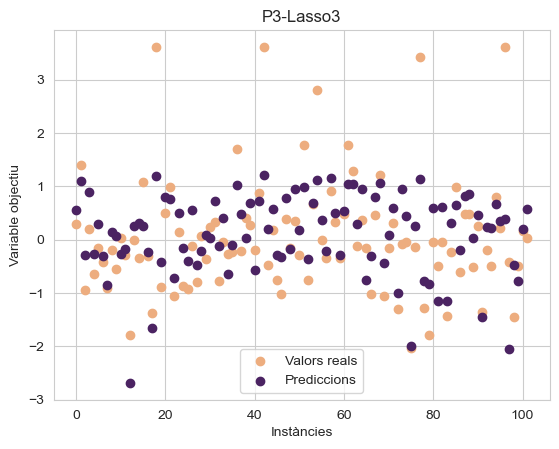

       Actual      Pred   Residus
173  0.300940  0.556920 -0.255979
274  1.404389  1.105358  0.299031
491 -0.952978 -0.281220 -0.671758
72   0.200627  0.883561 -0.682934
452 -0.639498 -0.278135 -0.361364
Train: 0.534559321912796
Test: 0.5365407246280045
R2:  0.5365407246280045


In [71]:
# Inicialització del model de Regressió Lasso amb paràmetre d'alpha igual a 0.1
Lasso3 = Lasso(alpha=0.1, max_iter=1000)

Lasso3.fit(x_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_train) # Entrenament del model amb les dades d'entrenament

pred_Lasso3 = Lasso3.predict(x_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']]) # Realització de les prediccions utilitzant el model entrenat

# Comparació dels valors reals i les prediccions del model de Regressió Lasso
dfLasso3 = comparar(y_test, pred_Lasso3, 'P3-Lasso3')
print(dfLasso3[:5])

print("Train:", Lasso3.score(x_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_train)) # Càlcul de la puntuació del model en les dades d'entrenament
print("Test:", Lasso3.score(x_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_test)) # Càlcul de la puntuació del model en les dades de prova
print("R2: ", r2_score(y_test, pred_Lasso3)) # Càlcul del coeficient R2

In [72]:
metriquesP3 = metriques('Lasso 3', metriquesP3, y_test, pred_Lasso3)

###### Decission tree

In [73]:
# Inicialització del model de Regressió amb Arbres de Decisió amb paràmetres de profunditat màxima igual a 4 i estat aleatori igual a 42
DecTree3 = DecisionTreeRegressor(max_depth=10, random_state=42, criterion='squared_error', splitter='best')

# Entrenament del model amb les dades d'entrenament
DecTree3.fit(x_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

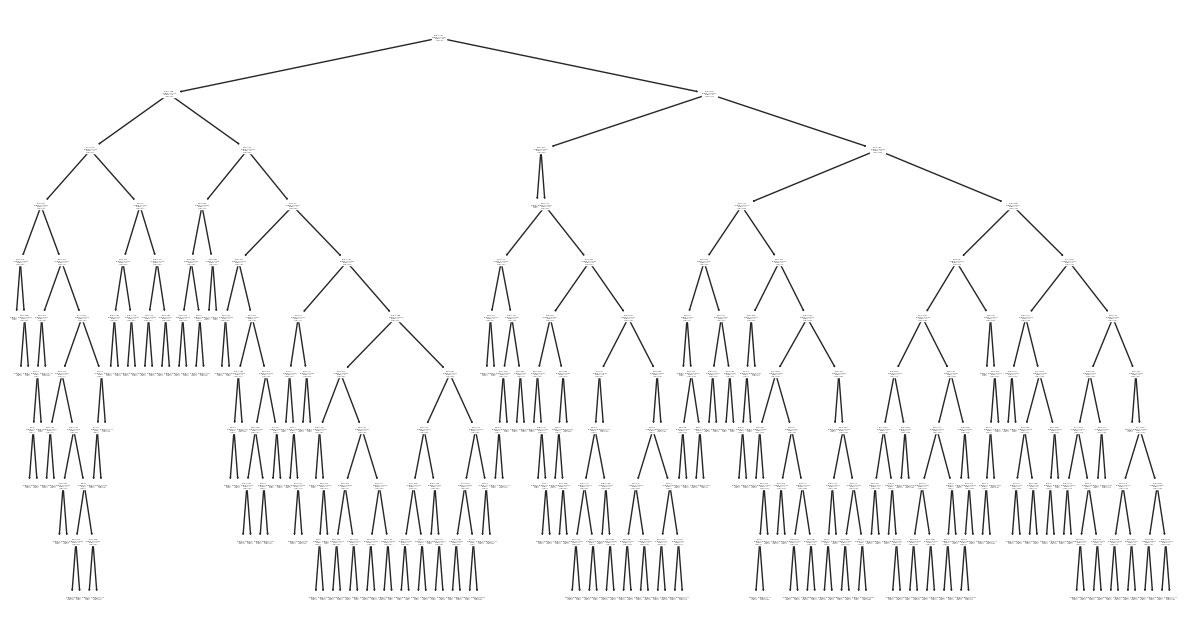

In [74]:
# Creació d'una figura amb una mida de 15x8 per visualitzar l'arbre de decisió
plt.figure(figsize=(15, 8))

# Visualització de l'arbre de decisió
tree.plot_tree(DecTree3)

pred_DecTree3 = DecTree3.predict(x_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']])  # Predicció utilitzant l'arbre de decisió

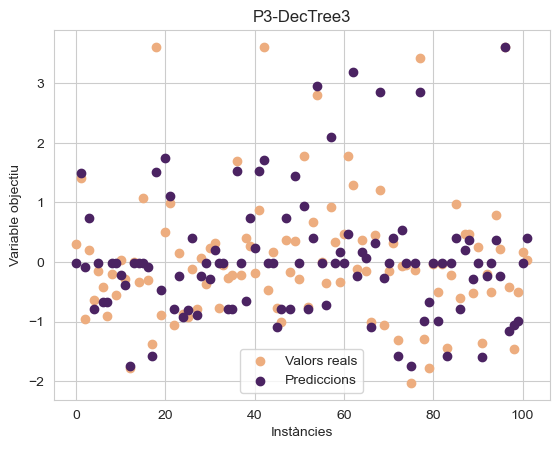

       Actual      Pred   Residus
173  0.300940 -0.022093  0.323033
274  1.404389  1.492163 -0.087774
491 -0.952978 -0.087774 -0.865204
72   0.200627  0.739812 -0.539185
452 -0.639498 -0.784068  0.144569
Train: 0.9811011200568975
Test: 0.6954211603924303
R2:  0.6954211603924303


In [75]:
# Comparació dels valors reals i les prediccions de l'arbre de decisió
dfDecTree3 = comparar(y_test, pred_DecTree3, 'P3-DecTree3')
print(dfDecTree3[:5])

print("Train:", DecTree3.score(x_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_train))  # Puntuació del model en les dades d'entrenament
print("Test:", DecTree3.score(x_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_test))  # Puntuació del model en les dades de prova
print("R2: ", r2_score(y_test, pred_DecTree3))  # Càlcul del coeficient R2 

In [76]:
metriquesP3 = metriques('Decission Tree 3', metriquesP3, y_test, pred_DecTree3)

###### ElasticNet

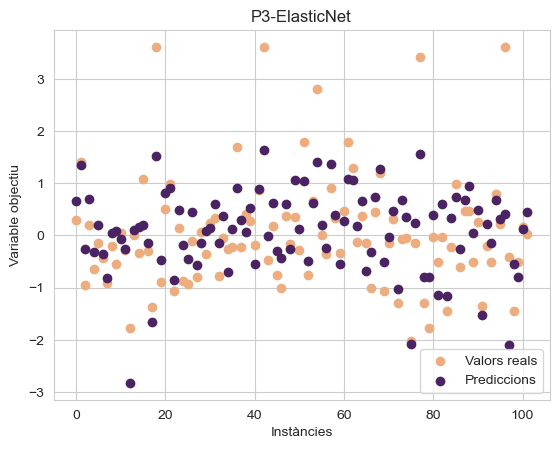

       Actual      Pred   Residus
173  0.300940  0.657063 -0.356122
274  1.404389  1.351143  0.053246
491 -0.952978 -0.265565 -0.687413
72   0.200627  0.703666 -0.503039
452 -0.639498 -0.318355 -0.321143
Train: 0.5928441881892621
Test: 0.6181016468279097
R2: 0.6181016468279097


In [77]:
# Inicialització del model Elastic Net amb paràmetres alpha i l1_ratio
elastic_net3 = ElasticNet(alpha=0.1, l1_ratio=0.25)

elastic_net3.fit(x_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_train) # Entrenament del model amb les dades d'entrenament

pred_elastic_net3 = elastic_net3.predict(x_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']]) # Realització de les prediccions amb les dades de prova

# Comparació dels valors reals i les prediccions del model Elastic Net
df_elastic_net3 = comparar(y_test, pred_elastic_net3, 'P3-ElasticNet')
print(df_elastic_net3[:5])

print("Train:", elastic_net3.score(x_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_train)) # Puntuació del model en les dades d'entrenament
print("Test:", elastic_net3.score(x_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT','NOX']], y_test)) # Puntuació del model en les dades de prova
print("R2:", r2_score(y_test, pred_elastic_net3)) # Càlcul del coeficient R2 

In [78]:
metriquesP3=metriques('Elastic Net 3',metriquesP3,y_test, pred_elastic_net3)

____

In [79]:
metriquesP3 = pd.DataFrame(metriquesP3,columns=['Tipus de Regresió','R²','% R²','mse','rmse','mae'])

In [80]:
display(pd.concat([metriquesP2, metriquesP3], axis=1))

,Tipus de Regresió,R²,% R²,mse,rmse,mae,Tipus de Regresió,R²,% R²,mse,rmse,mae
0,Regressió lineal 2,0.67,67.0 %,0.38,0.62,0.40,Regressió lineal 3,0.67,67.0 %,0.38,0.62,0.43
1,Random Forest 2,0.89,89.0 %,0.12,0.35,0.26,Random Forest 3,0.81,81.0 %,0.22,0.47,0.33
2,Ridge 2,0.65,65.0 %,0.41,0.64,0.40,Ridge 3,0.70,70.0 %,0.35,0.59,0.42
3,Lasso 2,0.56,56.0 %,0.50,0.71,0.49,Lasso 3,0.54,54.0 %,0.53,0.73,0.52
4,Decission Tree 2,0.84,84.0 %,0.18,0.43,0.31,Decission Tree 3,0.70,70.0 %,0.35,0.59,0.42
5,Elastic Net 2,0.57,57.0 %,0.49,0.70,0.48,Elastic Net 3,0.62,62.0 %,0.44,0.66,0.47


Per comparar les dues taules, podem observar les diferències en les mètriques de rendiment de cada tipus de regressió entre les dues taules. La columna "Tipus de Regressió" indica el nom del model de regressió, i les altres columnes proporcionen les mètriques R², % R², mse, rmse i mae per a cada tipus de regressió.

A primera vista, podem observar els següents canvis:

1. Per a la regressió lineal (Regressió lineal 2 vs Regressió lineal 3), s'observa que els valors es mantenen a tot menys al mae que puja de 0.40 a 0.43.

2. Per al Random Forest (Random Forest 2 vs Random Forest 3), es produeix una disminució en el R² (0.89 a 0.81), així com un augment en el mse, rmse i mae.

3. Per a Ridge (Ridge 2 vs Ridge 3), s'observen canvis similars a la regressió lineal, amb un lleuger augment en el R² (0.65 a 0.70), així com una disminució en el mse, rmse, el mae pujarà una mica (de 0.40 a 0.42)

4. Per a Lasso (Lasso 2 vs Lasso 3), no es produeixen canvis significatius en les mètriques. El R² varia poc (0.56 a 0.54) i hi ha una lleugera baixada en el mse, rmse i mae.

5. Per a Decision Tree (Decision Tree 2 vs Decision Tree 3), s'observa una disminució en el R² (0.84 a 0.70), així com un augment en el mse, rmse i mae.

6. Per a Elastic Net (Elastic Net 2 vs Elastic Net 3), hi ha una pujada de R² (0.57 a 0.62) i hi ha una lleugera diferència en el mse, rmse i mae.

En general, sembla que l'eliminació de la variable RM ha tingut un impacte variable en els diferents models. Alguns models mostren millores lleugeres a les mètriques (com la regressió lineal i Ridge), mentre que altres mostren un empitjorament (com Random Forest i Decision Tree). En els casos de Lasso i Elastic Net, no s'observen canvis significatius a les mètriques.